# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt

## 0.1 Load Data

In [2]:
df_raw = pd.read_csv('../data/01_raw/df_ready.csv')

In [3]:
df_raw = df_raw.drop(columns={  'Unnamed: 0', 'Date_imp', 'Cluster', 'condition', 'sourceURLs', 'Date_imp_d.1', 
                                'Zscore_1', 'price_std', 'imageURLs', 'shipping', 'weight', 'currency'})

In [4]:
df_raw.head()

Date_imp_d                 Category_name  \
0  2017/12/14  speaker, portable, bluetooth   
1  2017/09/08  speaker, portable, bluetooth   
2  2017/10/24  speaker, portable, bluetooth   
3  2017/08/15  speaker, portable, bluetooth   
4  2017/09/14  speaker, portable, bluetooth   

                                                name  price  disc_price  \
0  Boytone - 2500W 2.1-Ch. Home Theater System - ...  69.00       64.99   
1  Boytone - 2500W 2.1-Ch. Home Theater System - ...  69.00       69.00   
2  Boytone - 2500W 2.1-Ch. Home Theater System - ...  66.00       66.00   
3  Boytone - 2500W 2.1-Ch. Home Theater System - ...  74.99       74.99   
4  Boytone - 2500W 2.1-Ch. Home Theater System - ...  69.99       69.99   

      merchant  Disc_percentage isSale  Imp_count    brand  \
0  Walmart.com             0.06    Yes          1  Boytone   
1  Walmart.com             0.00     No          1  Boytone   
2  Walmart.com             0.00     No          1  Boytone   
3  Walmart.com             0.00     No          1  Boytone   
4  Walmart.com             0.00     No          1  Boytone   

                                       p_description             dateAdded  \
0  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   
1  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   
2  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   
3  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   
4  Stereos,Portable Bluetooth Speakers,TV, Video ...  2015-05-18T14:14:56Z   

               dateSeen           dateUpdated manufacturer     Day_n  month  \
0  2017-12-14T06:00:00Z  2018-06-13T19:39:02Z      Boytone  Thursday     12   
1  2017-09-08T05:00:00Z  2018-06-13T19:39:02Z      Boytone    Friday      9   
2  2017-10-24T04:00:00Z  2018-06-13T19:39:02Z      Boytone   Tuesday     10   
3  2017-08-15T15:00:00Z  2018-06-13T19:39:02Z      Boytone   Tuesday      8   
4  2017-09-14T21:00:00Z  2018-06-13T19:39:02Z      Boytone  Thursday      9   

     month_n  day  Week_Number  
0   December   14           50  
1  September    8           36  
2    October   24           43  
3     August   15           33  
4  September   14           37

# 1.0 Descrição dos dados

In [5]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [6]:
cols_name = ['date_imp', 'category_name', 'name', 'price', 'disc_price',
       'merchant', 'disc_percentage', 'is_sale', 'imp_count', 'brand',
       'p_description', 'dateadded', 'dateseen', 'dateupdated', 'manufacturer',
       'day_n', 'month', 'month_n', 'day', 'week_number']
df1.columns = cols_name

## 1.2 Data Dimension

In [7]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of cols: {df1.shape[1]}')

Number of rows: 23151
Number of cols: 20


## 1.3 Data types

In [8]:
df1.dtypes

date_imp            object
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
disc_percentage    float64
is_sale             object
imp_count            int64
brand               object
p_description       object
dateadded           object
dateseen            object
dateupdated         object
manufacturer        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
dtype: object

## 1.4 Check NA

In [9]:
df1.isna().sum()

date_imp               0
category_name          0
name                   0
price                  0
disc_price             0
merchant               0
disc_percentage        0
is_sale                0
imp_count              0
brand                  0
p_description          0
dateadded              0
dateseen               0
dateupdated            0
manufacturer       10639
day_n                  0
month                  0
month_n                0
day                    0
week_number            0
dtype: int64

## 1.5 Change Types

In [10]:
df1['date_imp'] = pd.to_datetime( df1['date_imp'])

## 1.7 Descriptive Statistics

In [11]:
num_attributes = df1.select_dtypes( include=['float64', 'int64'])
cat_attributes = df1.select_dtypes( exclude=['float64', 'int64', 'datetime64[ns]'])

## 1.7.1 Numerical attributes

In [12]:
# central tendency
ct1 = pd.DataFrame(num_attributes.apply(np.mean) ).T   # média
ct2 = pd.DataFrame(num_attributes.apply(np.median) ).T  # mediana

# dispersion
d1 = pd.DataFrame(num_attributes.apply(np.std) ).T # Desvio padrão
d2 = pd.DataFrame(num_attributes.apply(min) ).T # valor mínimo
d3 = pd.DataFrame(num_attributes.apply(max) ).T # valor máximo
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min())).T # Variação entre o mínimo e máxilo valor
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew())).T #skewness
d6 = pd.DataFrame(num_attributes.apply( lambda x : x.kurtosis())).T # kurtosis

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['att', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurt']
m

att  min       max     range        mean  median         std  \
0            price  1.0  10879.95  10878.95  513.037803  199.99  859.091448   
1       disc_price  1.0  10879.95  10878.95  494.104295  199.00  808.571509   
2  disc_percentage  0.0      0.80      0.80    0.016933    0.00    0.077847   
3        imp_count  1.0     31.00     30.00    6.560926    5.00    5.403049   
4            month  1.0     12.00     11.00    7.651030    8.00    2.592787   
5              day  1.0     31.00     30.00   15.693879   16.00    9.681413   
6      week_number  1.0     51.00     50.00   31.342750   32.00   11.316253   

       skew       kurt  
0  4.595160  34.411146  
1  4.748349  39.612839  
2  5.217632  28.754920  
3  1.286351   1.639569  
4 -0.099417  -0.628859  
5  0.032258  -1.331838  
6 -0.266980  -0.648027

# 2.0 EDA

In [13]:
df2 = df1.copy()

## 2.1 Qual o merchant que mais vendeu?

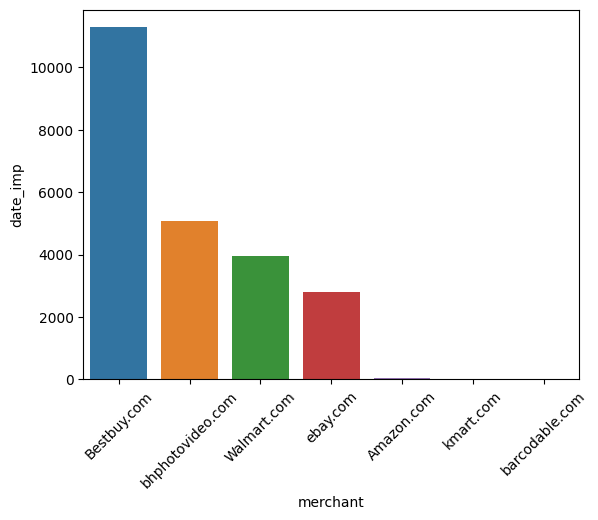

In [14]:
aux1 = df2[['date_imp', 'merchant']].groupby('merchant').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='merchant', y='date_imp', data=aux1)
plt.xticks(rotation=45);

In [15]:
# Seleção das lojas
df_best = df2[df2['merchant'] == 'Bestbuy.com']
df_bhp = df2[df2['merchant'] == 'bhphotovideo.com']
df_walmart = df2[df2['merchant'] == 'Walmart.com']
df_ebay = df2[df2['merchant'] == 'ebay.com']

## 2.2 Qual a categoria mais vendida?

### 2.2.1 Categorias mais vendidas no geral

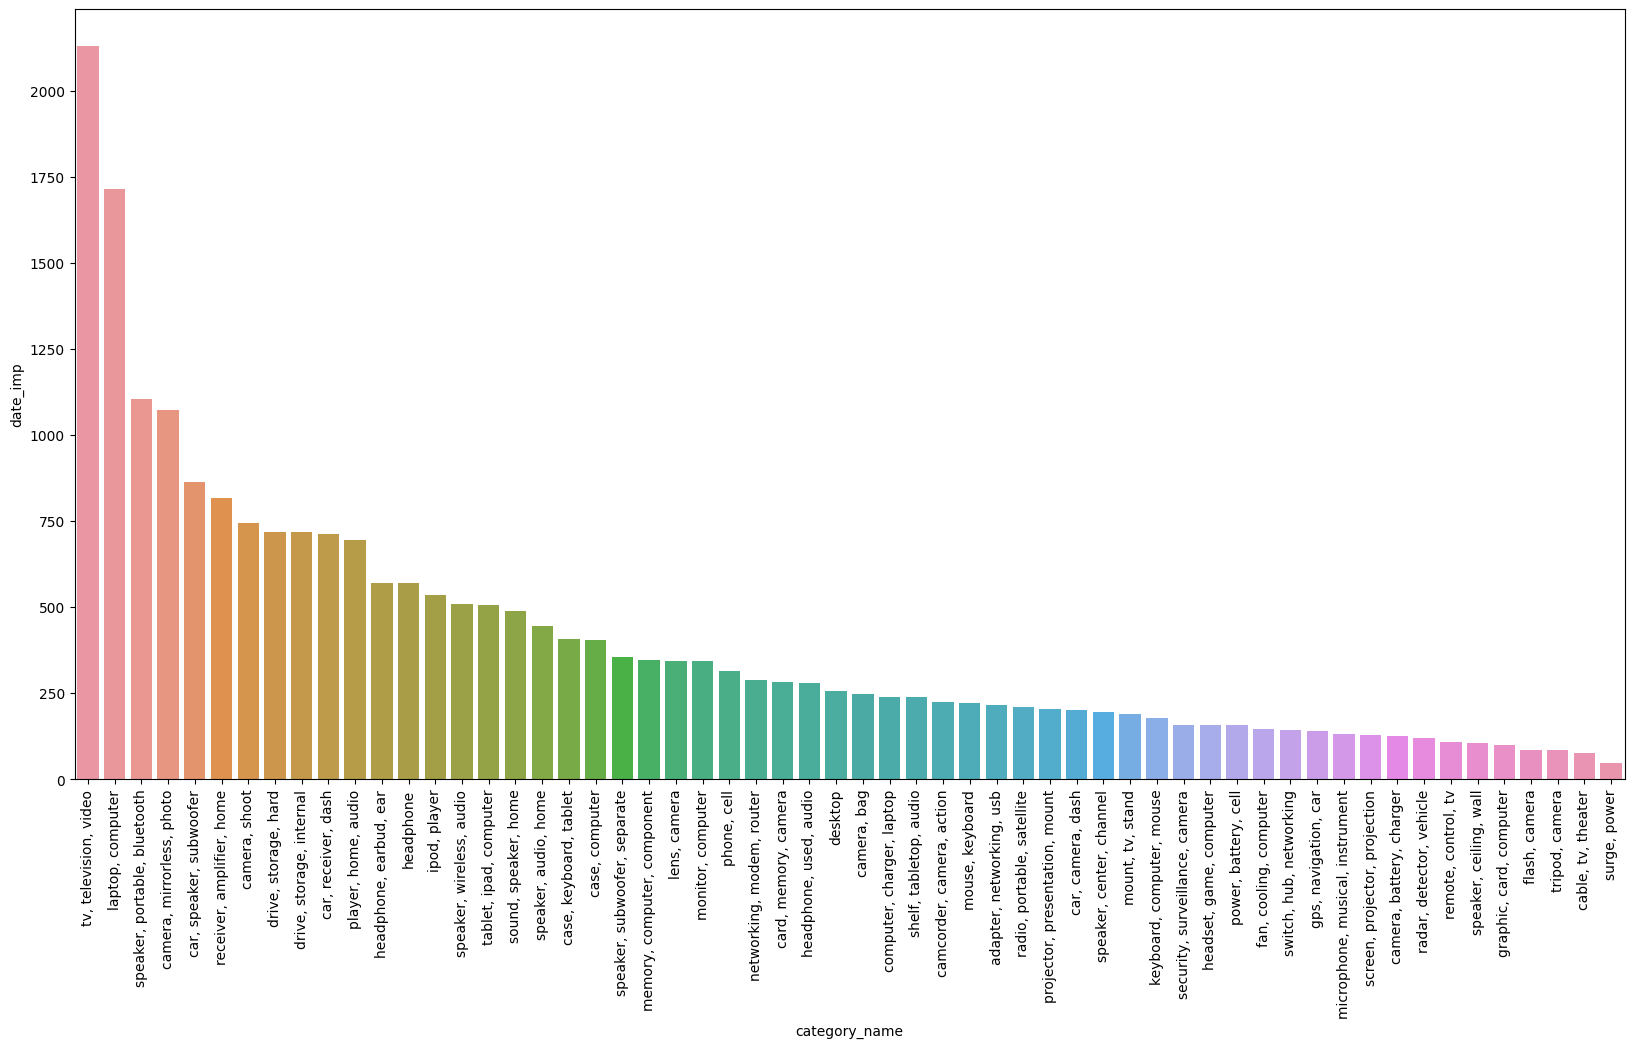

In [16]:
aux2 = df2[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.figure(figsize=(20, 10))
sns.barplot(x='category_name', y='date_imp', data=aux2)
plt.xticks(rotation=90);

### 2.2.2 Categorias mais vendidas por lojas

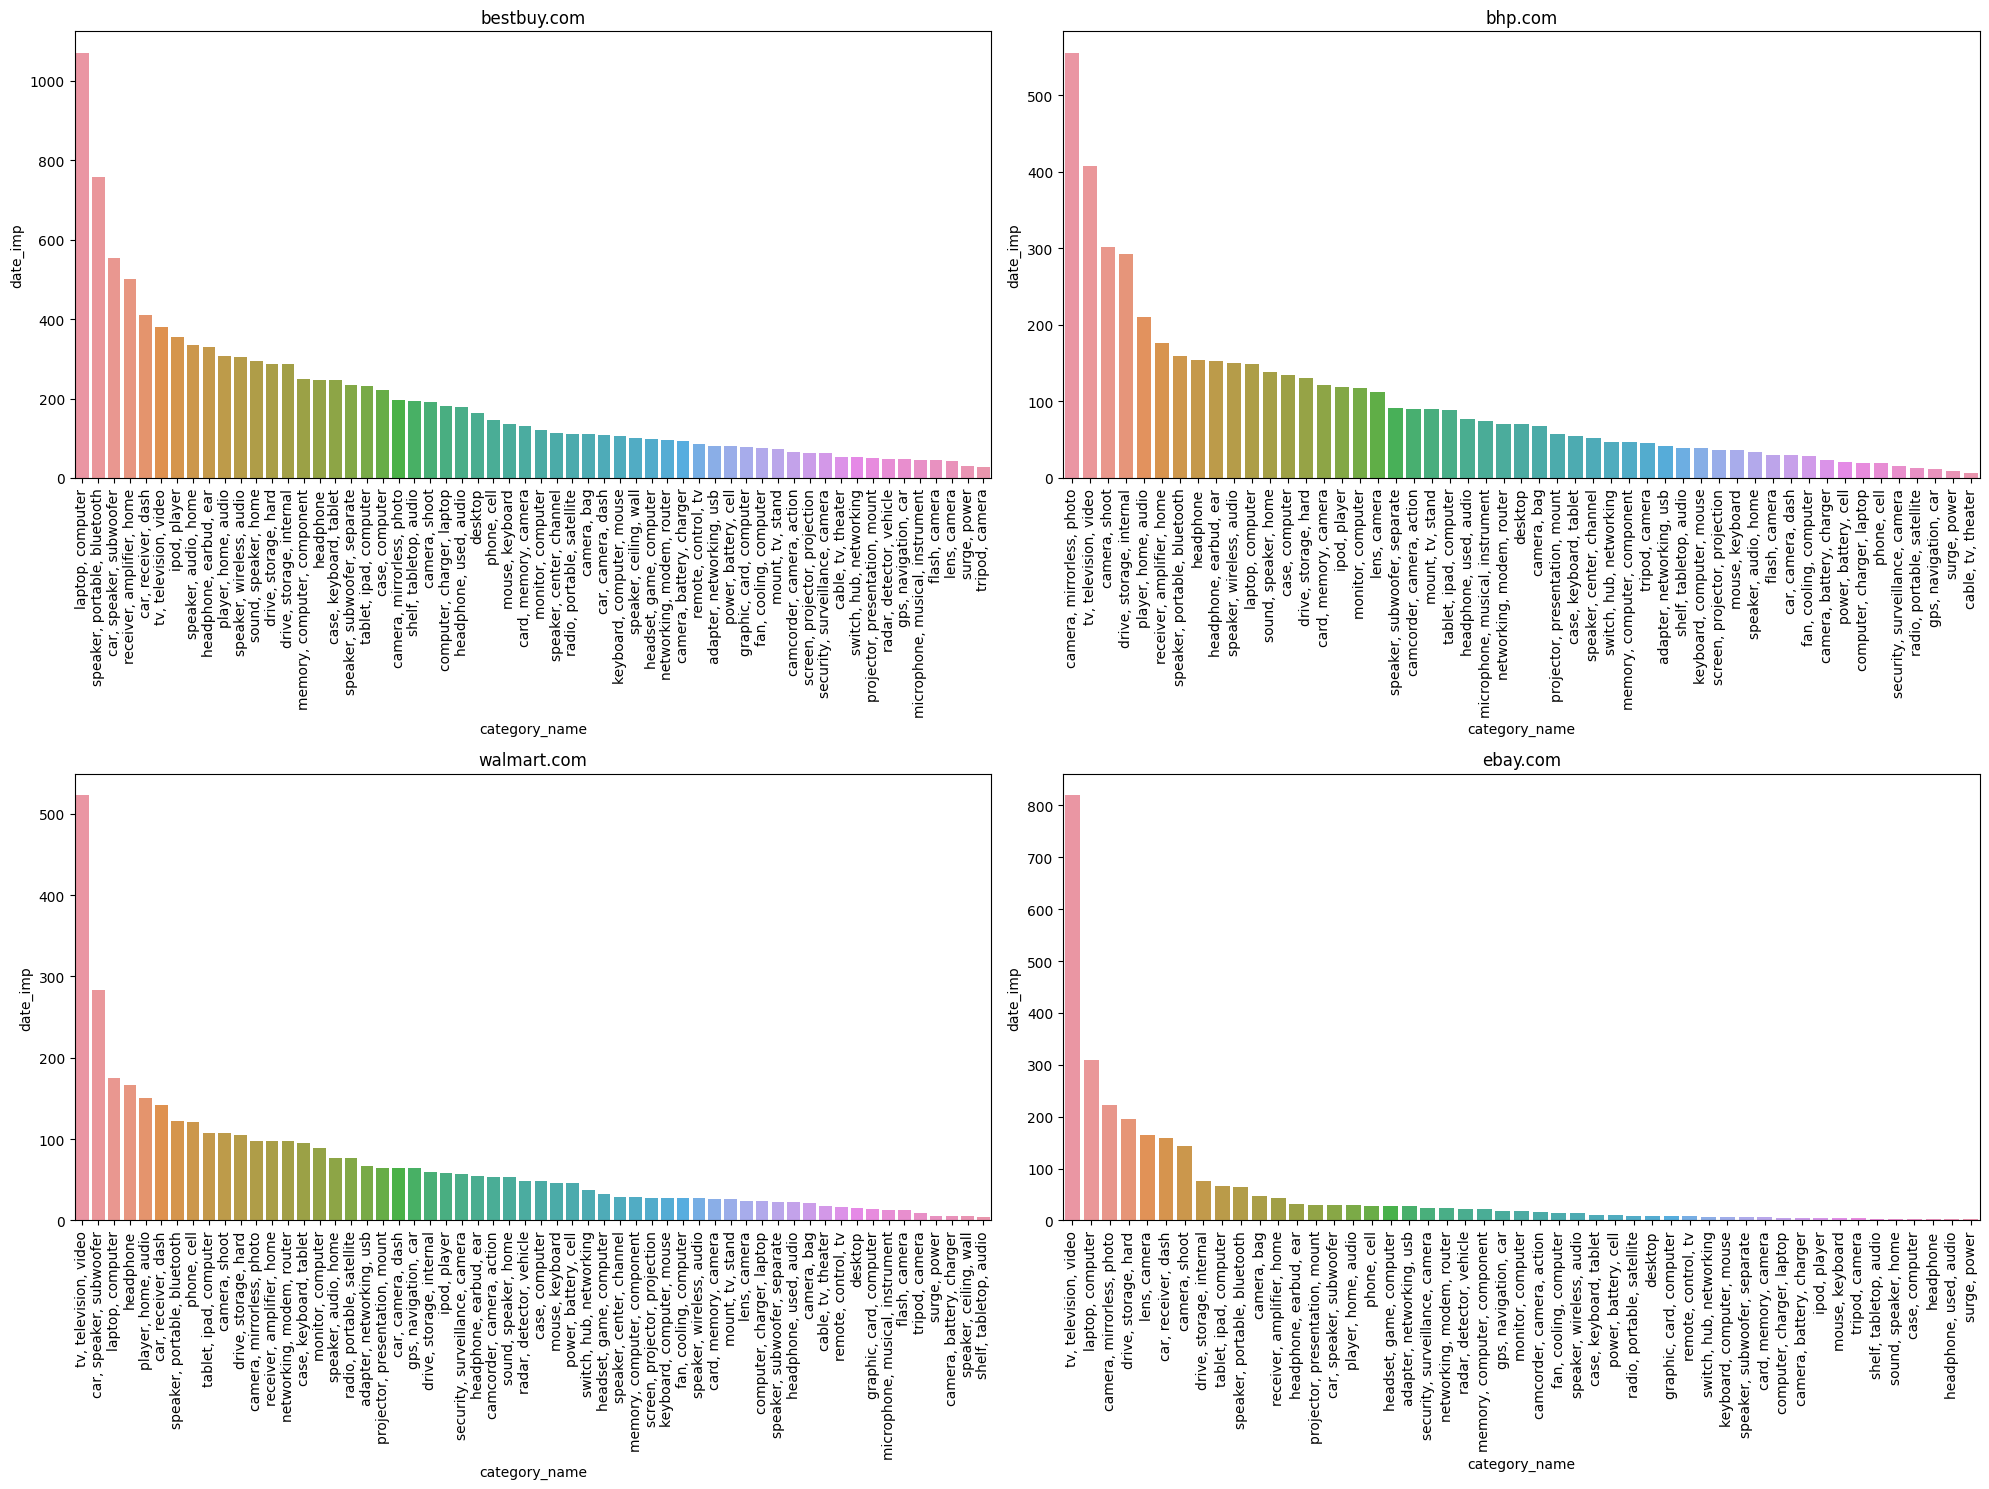

In [17]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.title('bestbuy.com')
aux2 = df_best[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='category_name', y='date_imp', data=aux2)
plt.xticks(rotation=90);

plt.subplot(2, 2, 2)
plt.title('bhp.com')
aux2 = df_bhp[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='category_name', y='date_imp', data=aux2)
plt.xticks(rotation=90);

plt.subplot(2, 2, 3)
plt.title('walmart.com')
aux2 = df_walmart[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='category_name', y='date_imp', data=aux2)
plt.xticks(rotation=90);

plt.subplot(2, 2, 4)
plt.title('ebay.com')
aux2 = df_ebay[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='category_name', y='date_imp', data=aux2)
plt.xticks(rotation=90)

plt.tight_layout();

## 2.3 Qual a marca mais vendida?

### 2.3.1 Qual a marca mais vendida no geral?

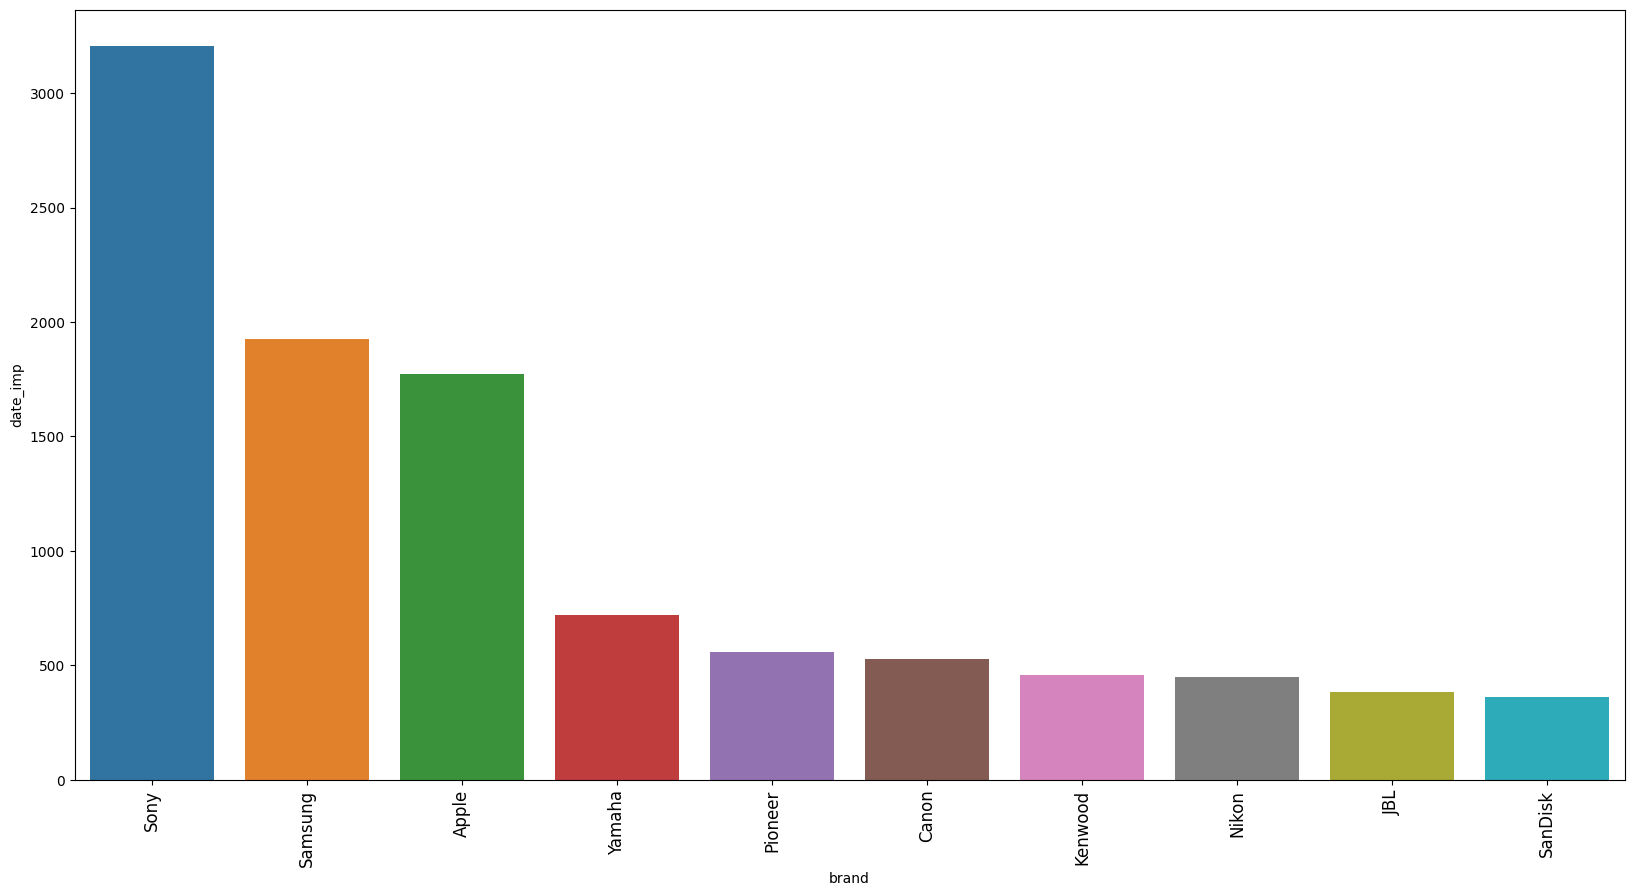

In [18]:
plt.figure(figsize=(20, 10))
aux2 = df2[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='brand', y='date_imp', data=aux2.head(10))
plt.xticks(rotation=90, fontsize=12);

### 2.3.2 Qual a marca mais vendida por loja?

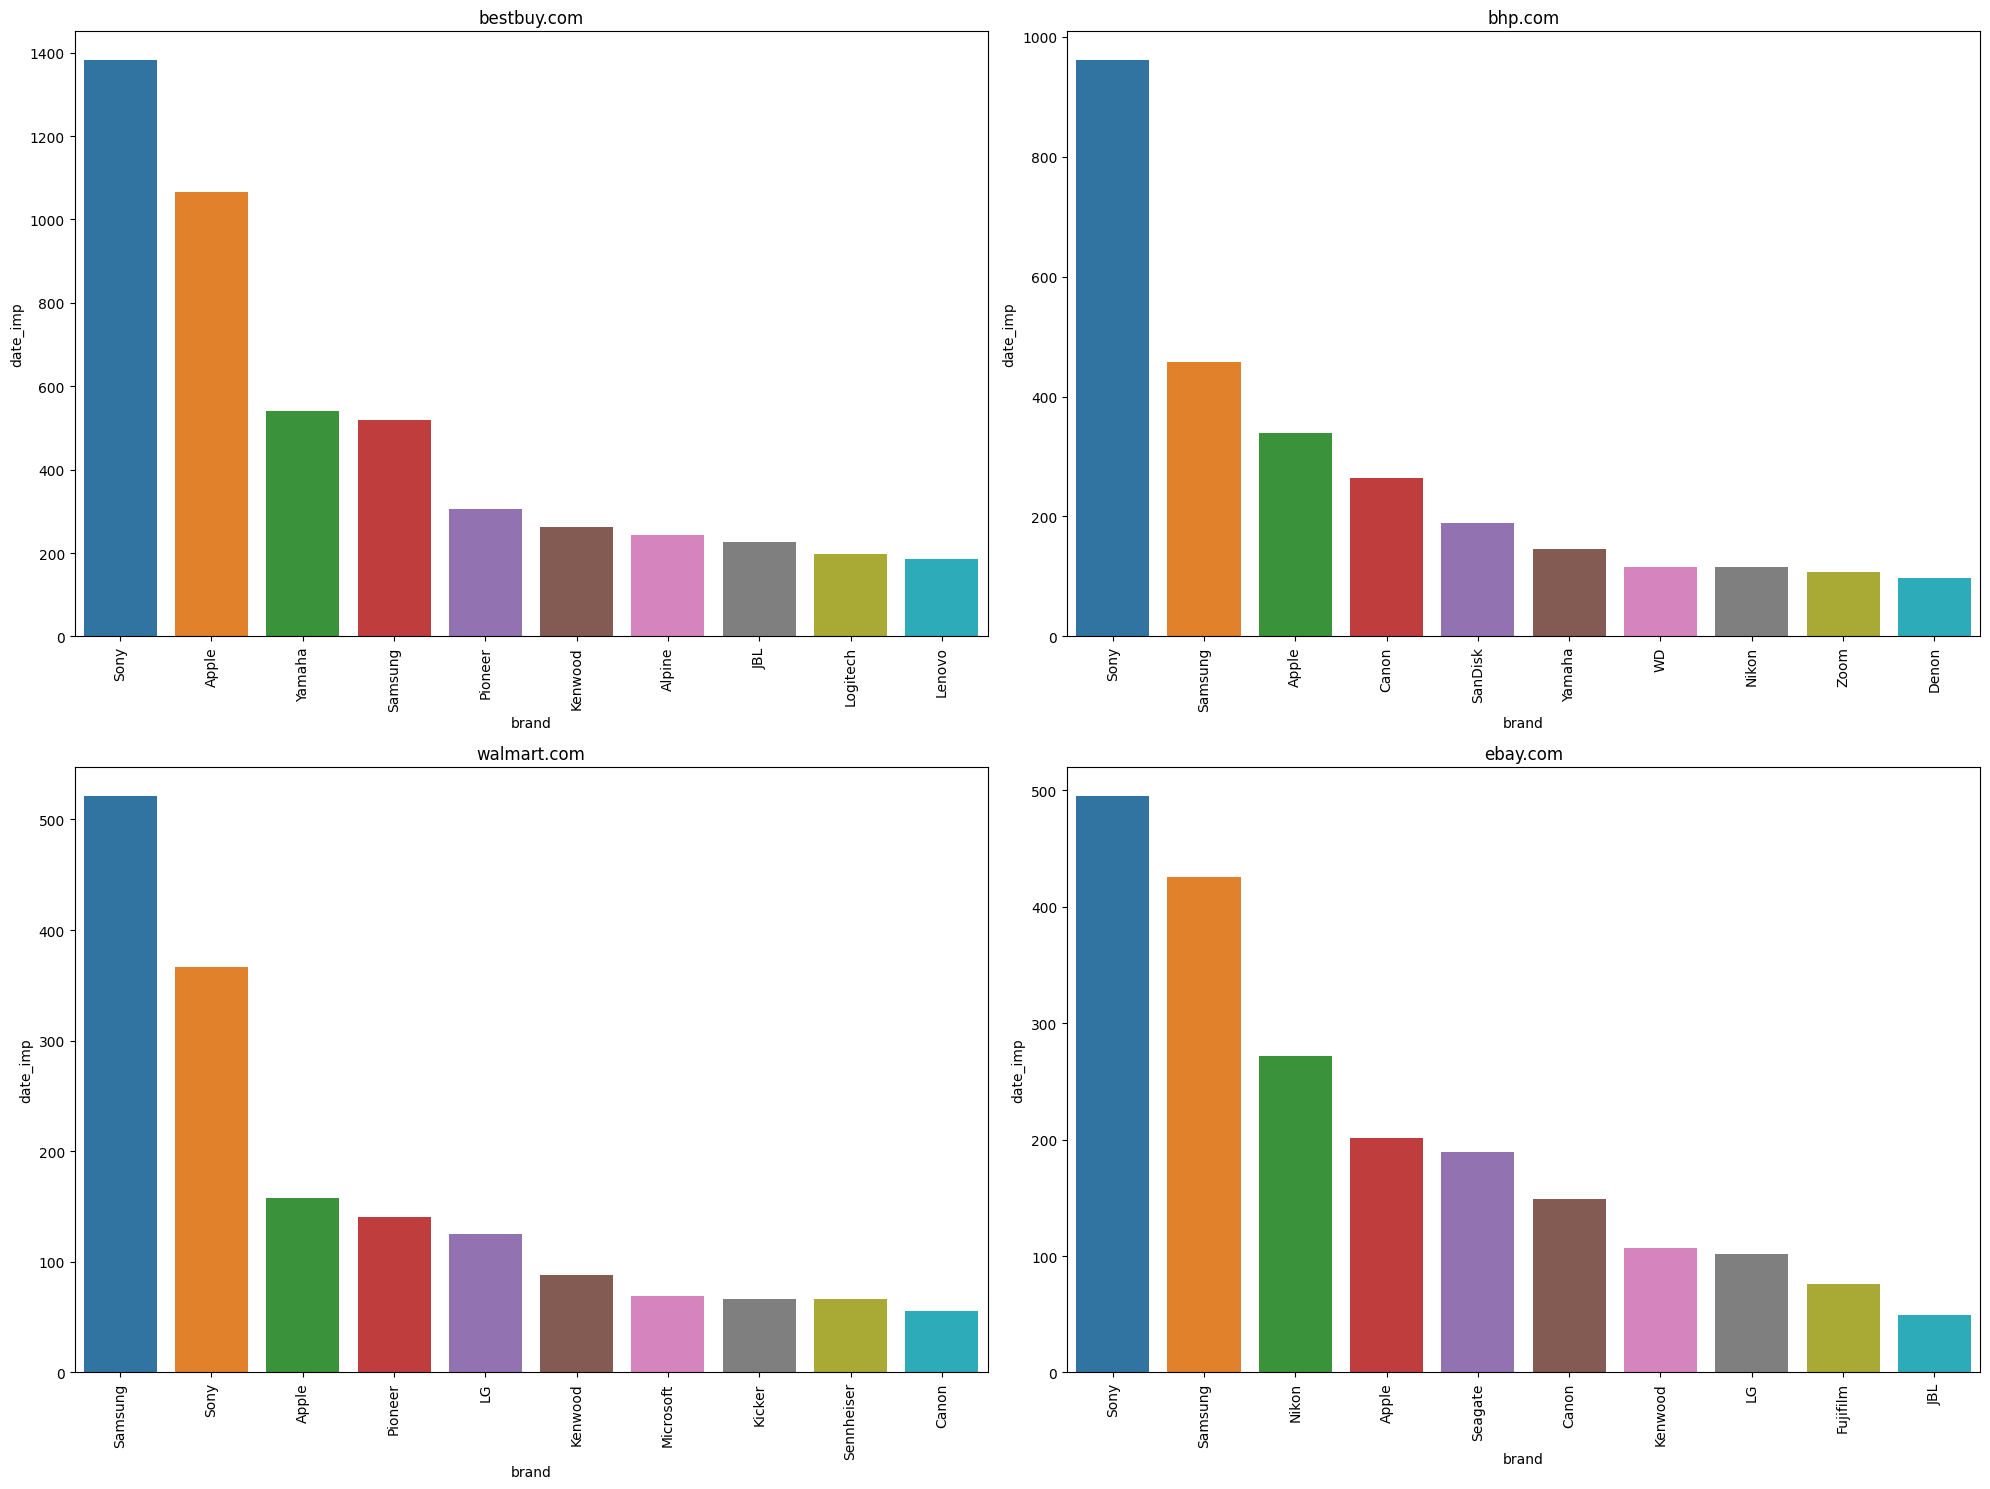

In [19]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.title('bestbuy.com')
aux2 = df_best[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='brand', y='date_imp', data=aux2.head(10))
plt.xticks(rotation=90);

plt.subplot(2, 2, 2)
plt.title('bhp.com')
aux2 = df_bhp[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='brand', y='date_imp', data=aux2.head(10))
plt.xticks(rotation=90);

plt.subplot(2, 2, 3)
plt.title('walmart.com')
aux2 = df_walmart[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='brand', y='date_imp', data=aux2.head(10))
plt.xticks(rotation=90);

plt.subplot(2, 2, 4)
plt.title('ebay.com')
aux2 = df_ebay[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='brand', y='date_imp', data=aux2.head(10))
plt.xticks(rotation=90)

plt.tight_layout();

## 2.4 Quais os dias que mais vendem?

### 2.4.1 Quais os dias que mais vendem no geral?

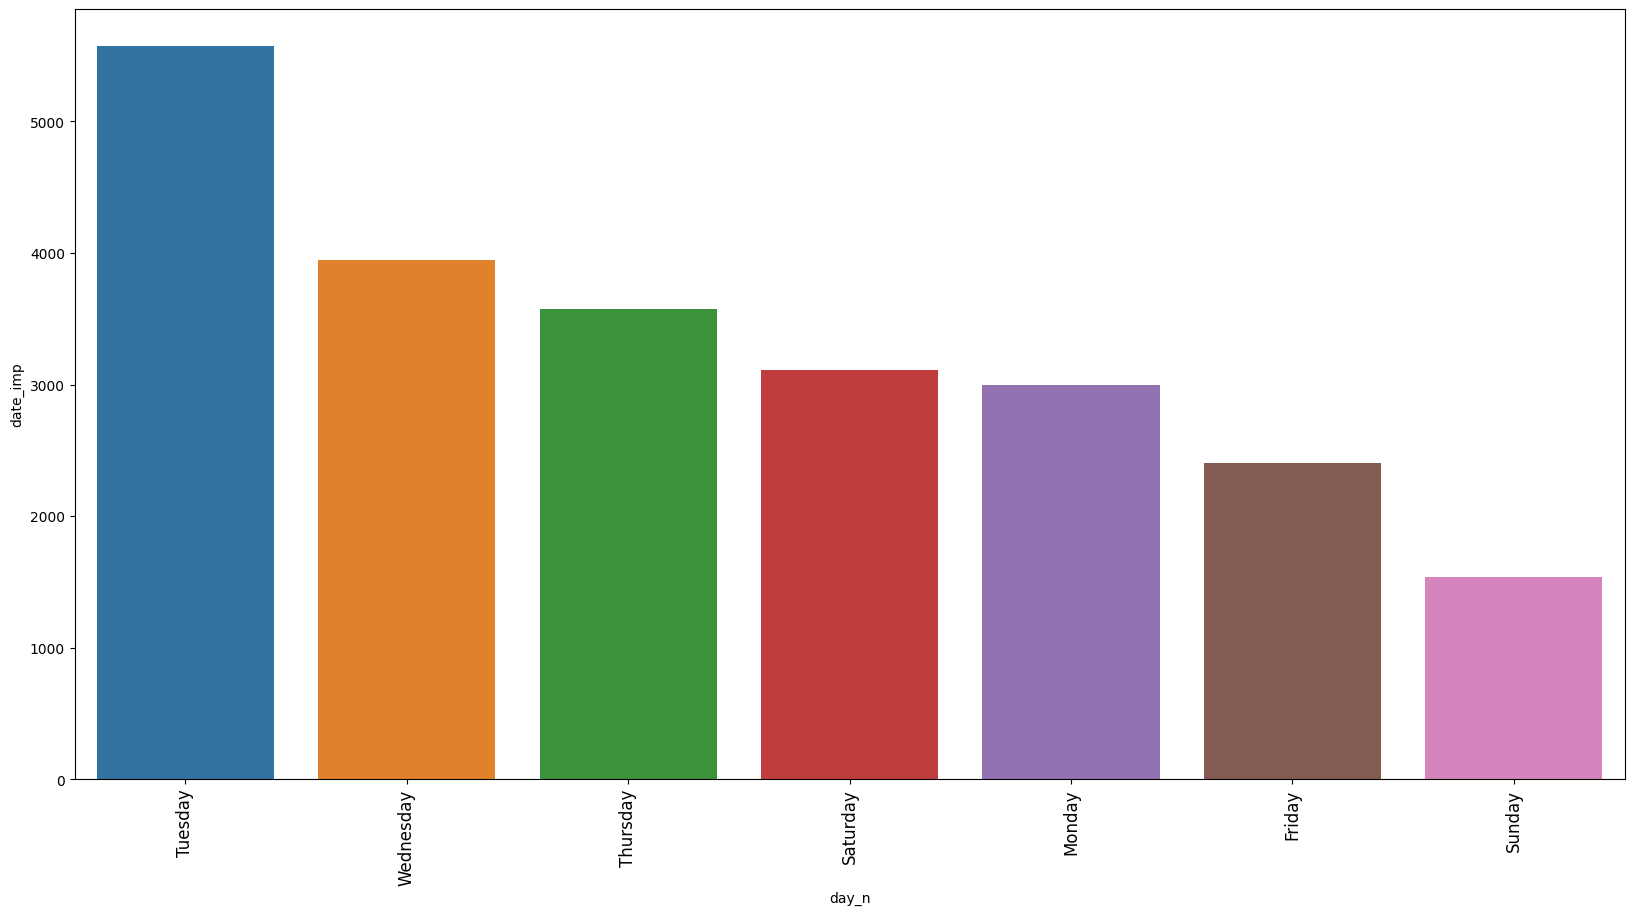

In [20]:
plt.figure(figsize=(20, 10))
aux2 = df2[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='day_n', y='date_imp', data=aux2)
plt.xticks(rotation=90, fontsize=12);

### 2.4.2 Quais os dias que mais vendem por loja?

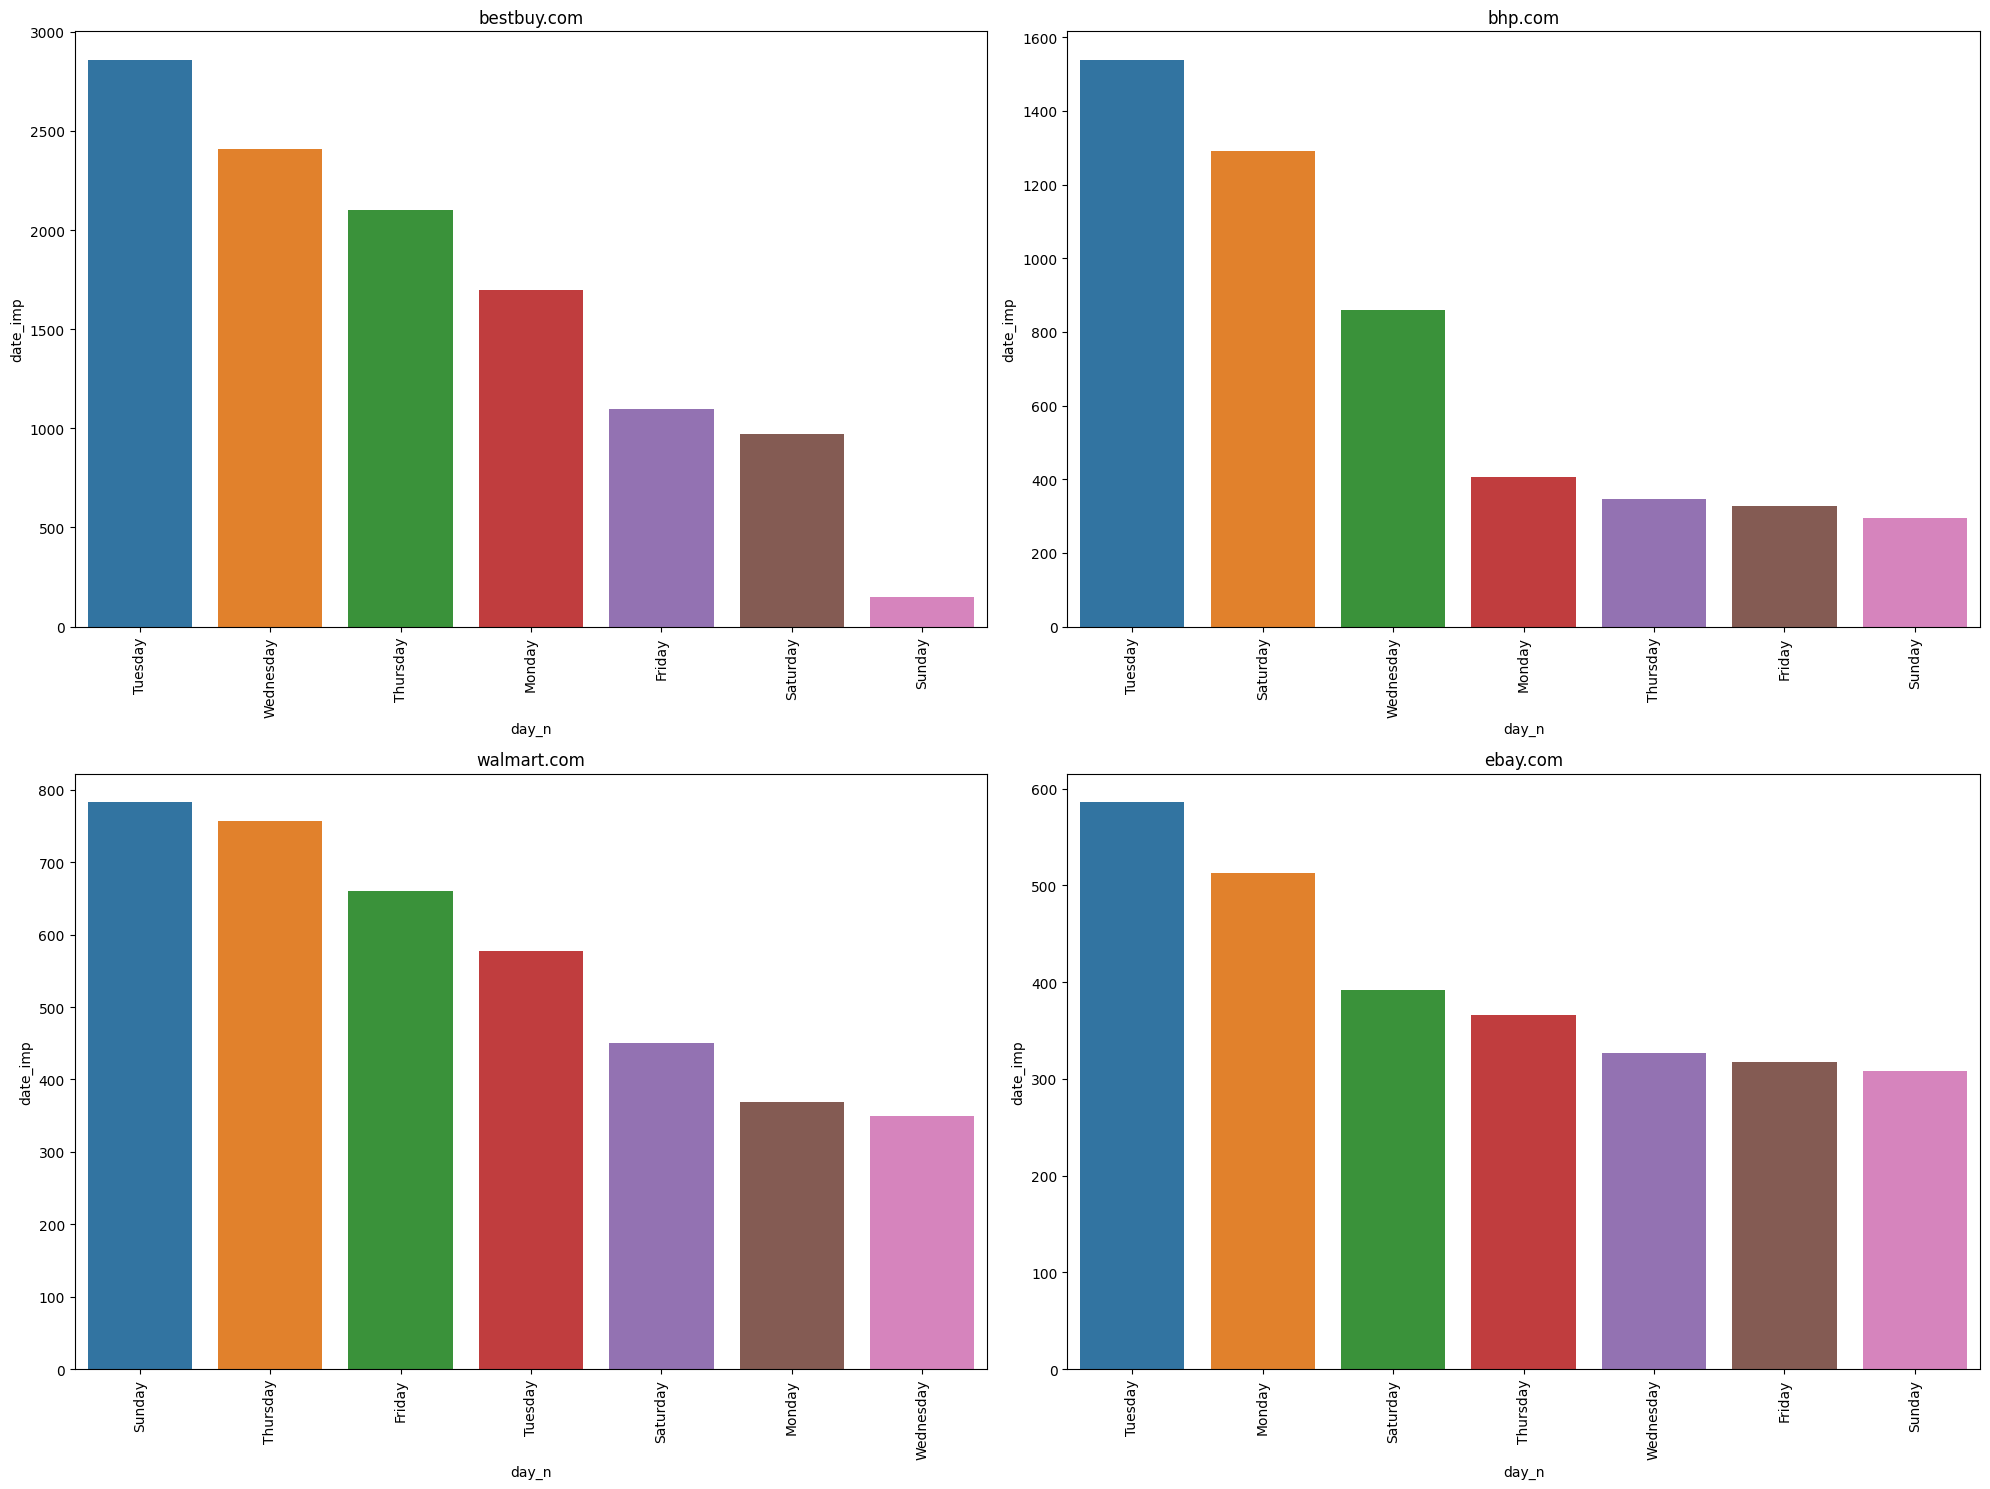

In [21]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.title('bestbuy.com')
aux2 = df_best[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='day_n', y='date_imp', data=aux2)
plt.xticks(rotation=90);

plt.subplot(2, 2, 2)
plt.title('bhp.com')
aux2 = df_bhp[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='day_n', y='date_imp', data=aux2)
plt.xticks(rotation=90);

plt.subplot(2, 2, 3)
plt.title('walmart.com')
aux2 = df_walmart[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='day_n', y='date_imp', data=aux2)
plt.xticks(rotation=90);

plt.subplot(2, 2, 4)
plt.title('ebay.com')
aux2 = df_ebay[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='day_n', y='date_imp', data=aux2)
plt.xticks(rotation=90)

plt.tight_layout();

## 2.5 Quais os meses que mais vendem?

### 2.5.1 Quais os meses que mais vendem no geral?

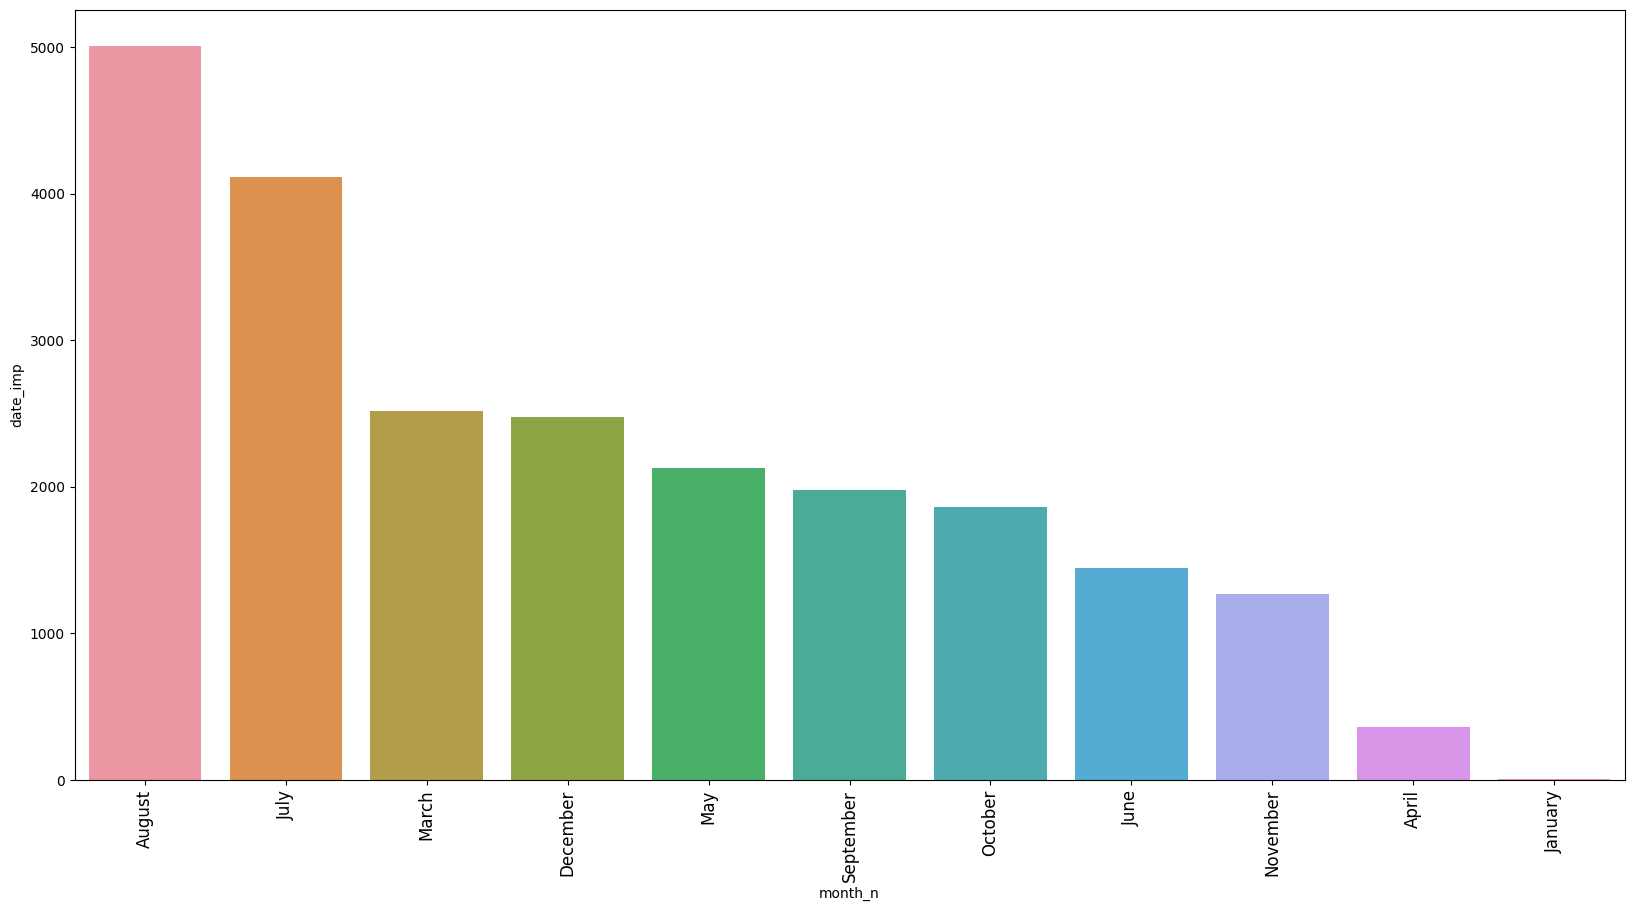

In [22]:
plt.figure(figsize=(20, 10))
aux2 = df2[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='month_n', y='date_imp', data=aux2)
plt.xticks(rotation=90, fontsize=12);

### 2.5.2 Quais os meses que mais vendem no por loja?

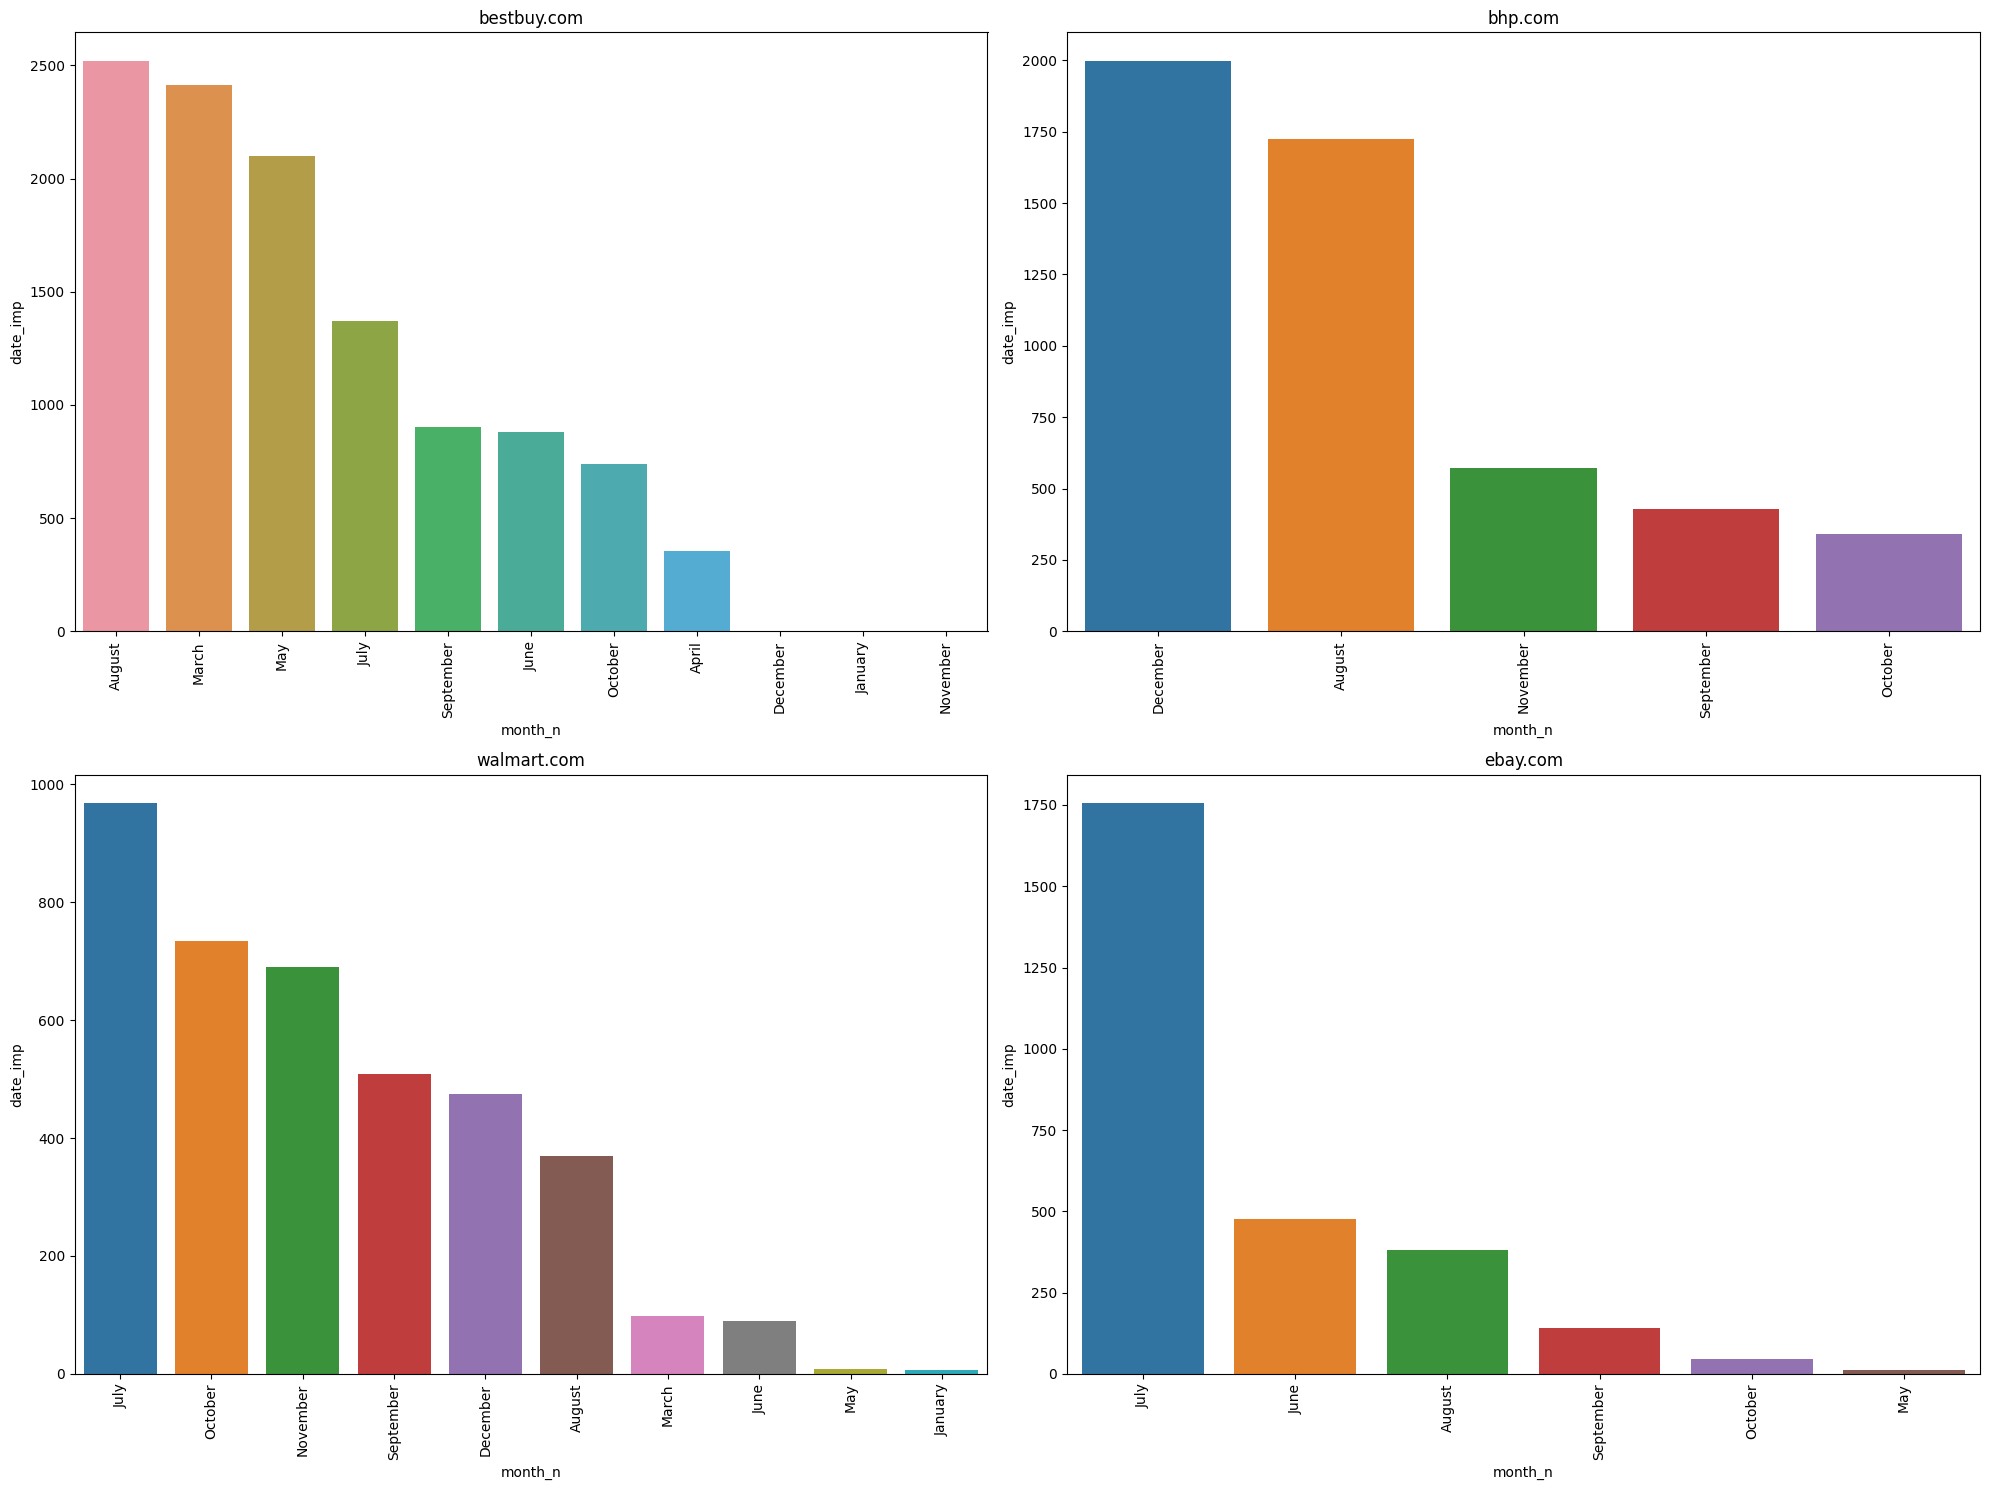

In [23]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.title('bestbuy.com')
aux2 = df_best[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='month_n', y='date_imp', data=aux2)
plt.xticks(rotation=90);

plt.subplot(2, 2, 2)
plt.title('bhp.com')
aux2 = df_bhp[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='month_n', y='date_imp', data=aux2)
plt.xticks(rotation=90);

plt.subplot(2, 2, 3)
plt.title('walmart.com')
aux2 = df_walmart[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='month_n', y='date_imp', data=aux2)
plt.xticks(rotation=90);

plt.subplot(2, 2, 4)
plt.title('ebay.com')
aux2 = df_ebay[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='month_n', y='date_imp', data=aux2)
plt.xticks(rotation=90)

plt.tight_layout();

## 2.6 Quais as semanas que mais vendem?

### 2.6.1 Quais as semanas que mais vendem no geral?

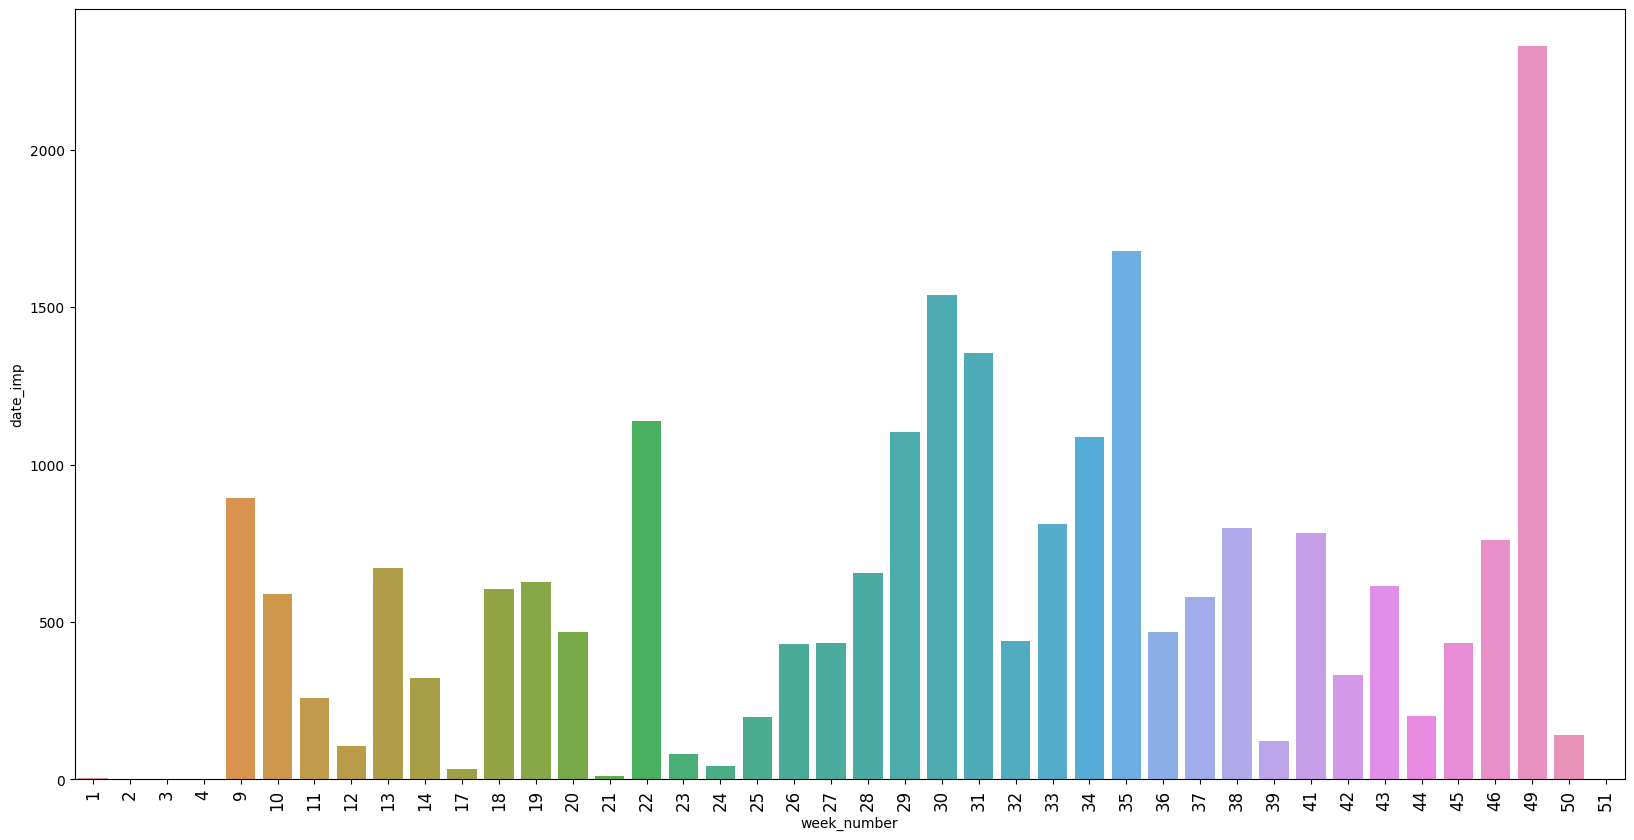

In [24]:
plt.figure(figsize=(20, 10))
aux2 = df2[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='week_number', y='date_imp', data=aux2)
plt.xticks(rotation=90, fontsize=12);

### 2.6.1 Quais as semanas que mais vendem por loja?

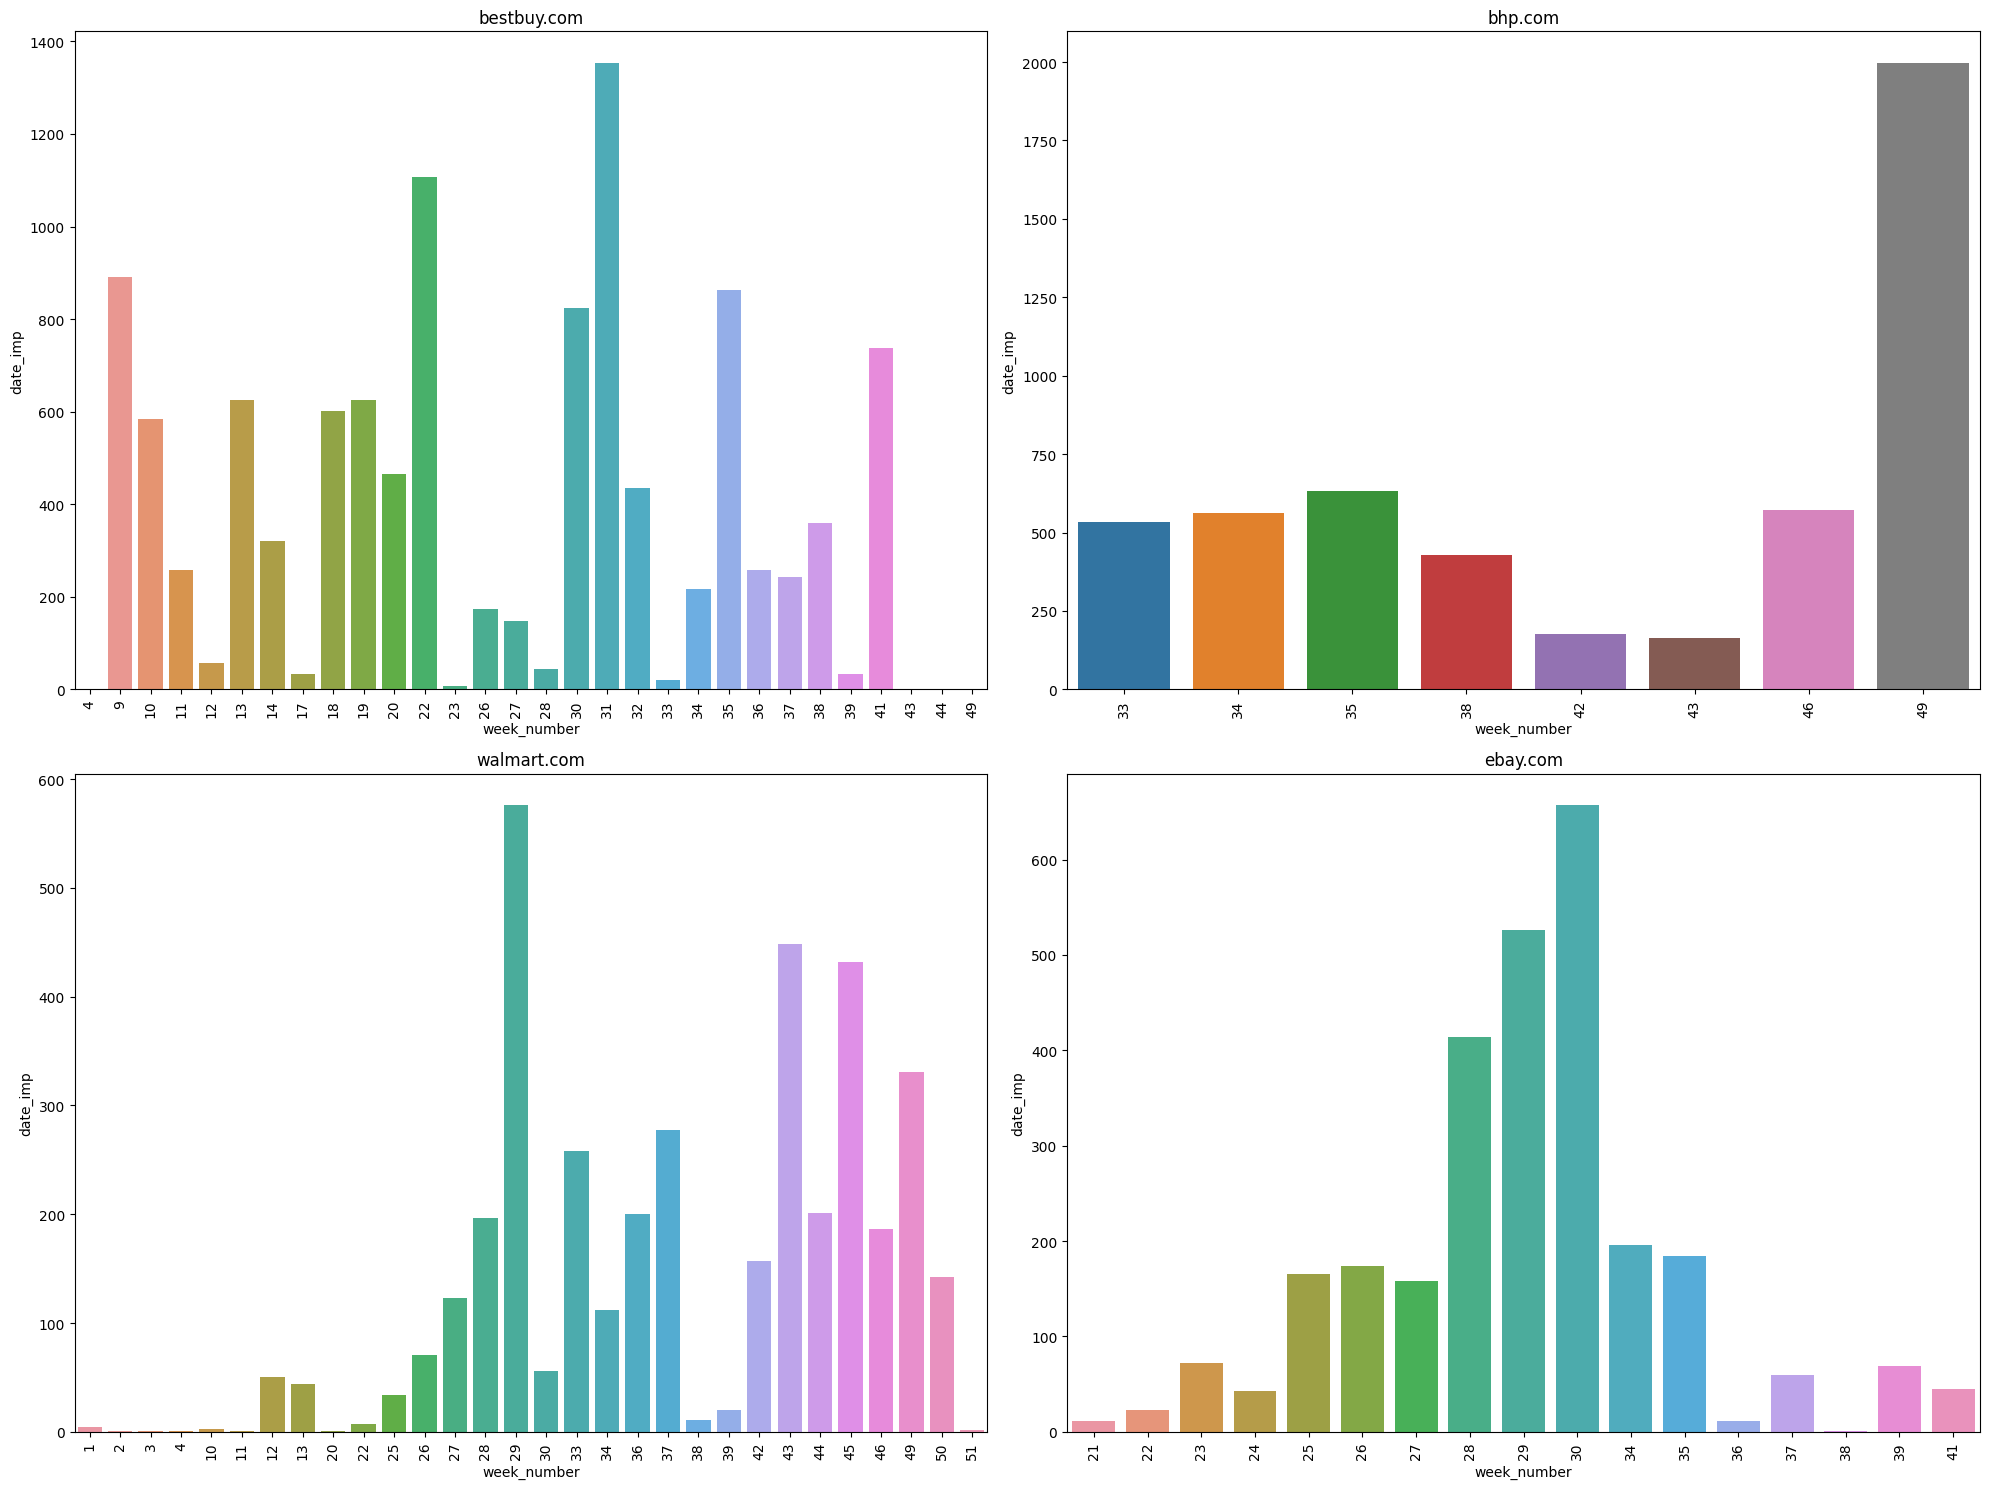

In [25]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.title('bestbuy.com')
aux2 = df_best[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='week_number', y='date_imp', data=aux2)
plt.xticks(rotation=90);

plt.subplot(2, 2, 2)
plt.title('bhp.com')
aux2 = df_bhp[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='week_number', y='date_imp', data=aux2)
plt.xticks(rotation=90);

plt.subplot(2, 2, 3)
plt.title('walmart.com')
aux2 = df_walmart[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='week_number', y='date_imp', data=aux2)
plt.xticks(rotation=90);

plt.subplot(2, 2, 4)
plt.title('ebay.com')
aux2 = df_ebay[['date_imp', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp', ascending=False)
sns.barplot(x='week_number', y='date_imp', data=aux2)
plt.xticks(rotation=90)

plt.tight_layout();

# 3.0 Feature Engineering

In [26]:
df3 = df2.copy()

## 3.1 Categoria mais vendida da Bestbuy.com

In [27]:
df_laptop = df_best[df_best['category_name'] == 'laptop, computer']

In [28]:
# check na
df_laptop.isna().sum()

date_imp             0
category_name        0
name                 0
price                0
disc_price           0
merchant             0
disc_percentage      0
is_sale              0
imp_count            0
brand                0
p_description        0
dateadded            0
dateseen             0
dateupdated          0
manufacturer       627
day_n                0
month                0
month_n              0
day                  0
week_number          0
dtype: int64

In [29]:
df_laptop_aux = df_laptop.groupby(['name', 'week_number']).agg({'disc_price': 'mean', 'date_imp': 'count'}).reset_index()
df_laptop_aux.head()

name  week_number  disc_price  date_imp
0  12 MacBook (Mid 2017, Gold)           30     1599.99         1
1  12 MacBook (Mid 2017, Gold)           31     1551.99         8
2  12 MacBook (Mid 2017, Gold)           33     1454.99         2
3  12 MacBook (Mid 2017, Gold)           34     1551.99         2
4  12 MacBook (Mid 2017, Gold)           35     1474.49         4

In [30]:
x_price = df_laptop_aux.pivot(index='week_number', columns='name', values='disc_price')
x_price.head()

name         12 MacBook (Mid 2017, Gold)  12 MacBook (Mid 2017, Silver)  \
week_number                                                               
4                                    NaN                            NaN   
9                                    NaN                            NaN   
10                                   NaN                            NaN   
11                                   NaN                            NaN   
13                                   NaN                            NaN   

name         12.3 32GB Multi-Touch 2-in-1 Chromebook Plus  \
week_number                                                 
4                                                     NaN   
9                                                 426.495   
10                                                426.495   
11                                                    NaN   
13                                                449.000   

name         13.3 MacBook Air (Mid 2017, Silver)  \
week_number                                        
4                                            NaN   
9                                            NaN   
10                                           NaN   
11                                           NaN   
13                                           NaN   

name         15.4 MacBook Pro with Touch Bar (Late 2016, Silver)  \
week_number                                                        
4                                                          NaN     
9                                                      2799.99     
10                                                     2799.99     
11                                                     2715.99     
13                                                     2547.99     

name         15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)  \
week_number                                                            
4                                                          NaN         
9                                                      2599.99         
10                                                     2599.99         
11                                                     2482.99         
13                                                     2353.99         

name         ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X  \
week_number                                                                                                        
4                                                          NaN                                                     
9                                                          NaN                                                     
10                                                         NaN                                                     
11                                                         NaN                                                     
13                                                         NaN                                                     

name         Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray"  \
week_number                                                                                                                                           
4                                                          NaN                                                                                        
9                                                       899.99                                                                                        
10                                                      899.99                                                                                        
11                                                         NaN                                                                     

In [31]:
y_demand = df_laptop_aux.pivot(index='week_number', columns='name', values='date_imp')
y_demand.head()

name         12 MacBook (Mid 2017, Gold)  12 MacBook (Mid 2017, Silver)  \
week_number                                                               
4                                    NaN                            NaN   
9                                    NaN                            NaN   
10                                   NaN                            NaN   
11                                   NaN                            NaN   
13                                   NaN                            NaN   

name         12.3 32GB Multi-Touch 2-in-1 Chromebook Plus  \
week_number                                                 
4                                                     NaN   
9                                                     4.0   
10                                                    2.0   
11                                                    NaN   
13                                                    1.0   

name         13.3 MacBook Air (Mid 2017, Silver)  \
week_number                                        
4                                            NaN   
9                                            NaN   
10                                           NaN   
11                                           NaN   
13                                           NaN   

name         15.4 MacBook Pro with Touch Bar (Late 2016, Silver)  \
week_number                                                        
4                                                          NaN     
9                                                          3.0     
10                                                         1.0     
11                                                         2.0     
13                                                         2.0     

name         15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)  \
week_number                                                            
4                                                          NaN         
9                                                          6.0         
10                                                         4.0         
11                                                         4.0         
13                                                         8.0         

name         ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X  \
week_number                                                                                                        
4                                                          NaN                                                     
9                                                          NaN                                                     
10                                                         NaN                                                     
11                                                         NaN                                                     
13                                                         NaN                                                     

name         Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray"  \
week_number                                                                                                                                           
4                                                          NaN                                                                                        
9                                                          2.0                                                                                        
10                                                         1.0                                                                                        
11                                                         NaN                                                                     

# 4.0 Data Description - Price x Demand

## 4.1 Data Dimension

In [32]:
print(f'Number of rows: {x_price.shape[0]}')
print(f'Number of cols: {x_price.shape[1]}')

Number of rows: 26
Number of cols: 39


In [33]:
print(f'Number of rows: {y_demand.shape[0]}')
print(f'Number of cols: {y_demand.shape[1]}')

Number of rows: 26
Number of cols: 39


## 4.2 Data Types

In [34]:
x_price.dtypes

name
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            float64
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          float64
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           float64
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                                    float64
15.4 MacBook Pro with Touch Bar (Late 2016, Silver)                                                                                                                    

In [35]:
y_demand.dtypes

name
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            float64
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          float64
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           float64
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                                    float64
15.4 MacBook Pro with Touch Bar (Late 2016, Silver)                                                                                                                    

## 4.3 Check NA

In [36]:
x_price.isna().sum()

name
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            17
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          18
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           13
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                                    21
15.4 MacBook Pro with Touch Bar (Late 2016, Silver)                                                                                                                                        

In [37]:
y_demand.isna().sum()

name
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            17
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          18
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           13
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                                    21
15.4 MacBook Pro with Touch Bar (Late 2016, Silver)                                                                                                                                        

## 4.4 Replace NA

In [38]:
price_median = np.round(x_price.median(), 2)
x_price.fillna(price_median, inplace=True)

In [39]:
y_demand.fillna(0, inplace=True)

## 4.5 Descriptive Statistics

In [40]:
# central tendency
ct1 = pd.DataFrame(x_price.apply(np.mean) ).T   # média
ct2 = pd.DataFrame(x_price.apply(np.median) ).T  # mediana

# dispersion
d1 = pd.DataFrame(x_price.apply(np.std) ).T # Desvio padrão
d2 = pd.DataFrame(x_price.apply(min) ).T # valor mínimo
d3 = pd.DataFrame(x_price.apply(max) ).T # valor máximo
d4 = pd.DataFrame(x_price.apply( lambda x: x.max() - x.min())).T # Variação entre o mínimo e máxilo valor
d5 = pd.DataFrame(x_price.apply( lambda x: x.skew())).T #skewness
d6 = pd.DataFrame(x_price.apply( lambda x : x.kurtosis())).T # kurtosis

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['att', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurt']
m

att       min      max  \
0                         12 MacBook (Mid 2017, Gold)  1454.990  1599.99   
1                       12 MacBook (Mid 2017, Silver)  1234.990  1299.99   
2        12.3 32GB Multi-Touch 2-in-1 Chromebook Plus   372.995   449.00   
3                 13.3 MacBook Air (Mid 2017, Silver)   911.990   969.99   
4   15.4 MacBook Pro with Touch Bar (Late 2016, Si...  2327.990  2799.99   
5   15.4 MacBook Pro with Touch Bar (Late 2016, Sp...  2023.990  2599.99   
6   ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...   237.490   313.49   
7   Acer - 2-in-1 15.6 Refurbished Touch-Screen La...   764.990   899.99   
8                   Acer 15.6 Chromebook CB5-571-C4G4   199.990   249.00   
9   Alienware - R3 17.3 Laptop - Intel Core i7 - 1...  1599.990  1899.99   
10  Apple - MacBook Pro® - 13 Display - Intel Core...  1315.990  1454.99   
11  Apple - MacBook Pro® - 13 Display - Intel Core...  1315.990  1454.99   
12  Apple - MacBook Pro® - 13 Display - Intel Core...  1794.490  1999.99   
13                  Apple 13.3 MacBook Air ( Silver)"   600.495  1234.99   
14  Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 ...  1079.990  1519.99   
15  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...   700.495  1432.49   
16  Apple MacBook Pro with Touch Bar - 13.3 - Core...  1610.740  1999.99   
17  Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen La...  1091.990  1329.99   
18  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...   719.990   799.99   
19  Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - I...   700.495  1399.99   
20  Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7...   900.495  2199.99   
21  Details About Alienware 13 R3 Aw13r3/13.3 Fhd/...  1349.990  1799.99   
22  Details About Alienware 15 R3 Aw15r3/15.6 Fhd/...  1601.990  1899.99   
23  Details About Apple Macbook Air 13.3 Laptop (e...   727.490   799.99   
24  Details About Asus Q304 13.3 Laptop I5 2.5 Ghz...   441.990   657.99   
25  Details About Dell Inspiron I75675650blkpus 15...   763.990   868.49   
26  Details About Openbox Excellent: Asus Rog Gl50...  1063.490  1249.99   
27  Details About Razer Blade Laptop 14 Full Hd (i...  1050.495  2099.99   
28   Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop"   123.490   189.99   
29  HP - ProBook 14 Laptop - Intel Core i5 - 4GB M...   799.990   819.99   
30  HP 15-AY103DX 15.6 Touchscreen Touch Screen HD...   427.490   499.99   
31  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...   170.990   229.99   
32  Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Lap...   513.990   664.99   
33  Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD To...   314.990   474.99   
34  Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD T...   316.990   383.99   
35  MSI - WS Series 15.6 Laptop - Intel Core i7 - ...  2299.990  2399.99   
36  New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5g...   554.990   949.99   
37  Razer - Blade Pro 17.3 4K Ultra HD Touch-Scree...  3674.990  4399.99   
38  Samsung - Notebook 5 15.6 Touch-Screen Laptop ...   569.990   617.49   

       range         mean   median         std      skew       kurt  
0    145.000  1547.124615  1551.99   25.648346 -2.457686   8.310054  
1     65.000  1295.990000  1299.99   14.317821 -3.735032  13.784949  
2     76.005   413.189808   415.50   15.423120 -1.054924   2.830858  
3     58.000   949.297692   949.99    8.393080 -2.975611  16.702015  
4    472.000  2607.393846  2618.99  112.833610 -1.131897   2.049122  
5    576.000  2346.913077  2353.99  122.523757 -0.274833   1.347179  
6     76.000   299.720769   304.99   16.347918 -2.916993   8.218479  
7    135.000   834.028462   829.99   27.804926  0.937281   2.943939  
8     49.010   242.479231   249.00   14.017001 -2.306458   4.514429  
9    300.000  1879.643846  1899.99   71.165540 -3.486137  11.301211  
10   139.000  1402.393846  1409.99   32.489945 -1.674626   2.634043  
11   139.000  1386.816923  1387.49   31.076191 -0.336021   1.248185  
12   205.500  1882.970769  1879.99   35.218134  1.074956   5.009074  
13   634.495  1105.894231  11

In [41]:
# central tendency
ct1 = pd.DataFrame(y_demand.apply(np.mean) ).T   # média
ct2 = pd.DataFrame(y_demand.apply(np.median) ).T  # mediana

# dispersion
d1 = pd.DataFrame(y_demand.apply(np.std) ).T # Desvio padrão
d2 = pd.DataFrame(y_demand.apply(min) ).T # valor mínimo
d3 = pd.DataFrame(y_demand.apply(max) ).T # valor máximo
d4 = pd.DataFrame(y_demand.apply( lambda x: x.max() - x.min())).T # Variação entre o mínimo e máxilo valor
d5 = pd.DataFrame(y_demand.apply( lambda x: x.skew())).T #skewness
d6 = pd.DataFrame(y_demand.apply( lambda x : x.kurtosis())).T # kurtosis

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['att', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurt']
m

att  min   max  range  \
0                         12 MacBook (Mid 2017, Gold)  0.0   8.0    8.0   
1                       12 MacBook (Mid 2017, Silver)  0.0   2.0    2.0   
2        12.3 32GB Multi-Touch 2-in-1 Chromebook Plus  0.0   4.0    4.0   
3                 13.3 MacBook Air (Mid 2017, Silver)  0.0   2.0    2.0   
4   15.4 MacBook Pro with Touch Bar (Late 2016, Si...  0.0   6.0    6.0   
5   15.4 MacBook Pro with Touch Bar (Late 2016, Sp...  0.0  12.0   12.0   
6   ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...  0.0   2.0    2.0   
7   Acer - 2-in-1 15.6 Refurbished Touch-Screen La...  0.0   2.0    2.0   
8                   Acer 15.6 Chromebook CB5-571-C4G4  0.0   4.0    4.0   
9   Alienware - R3 17.3 Laptop - Intel Core i7 - 1...  0.0   2.0    2.0   
10  Apple - MacBook Pro® - 13 Display - Intel Core...  0.0   6.0    6.0   
11  Apple - MacBook Pro® - 13 Display - Intel Core...  0.0   6.0    6.0   
12  Apple - MacBook Pro® - 13 Display - Intel Core...  0.0   6.0    6.0   
13                  Apple 13.3 MacBook Air ( Silver)"  0.0   6.0    6.0   
14  Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 ...  0.0   9.0    9.0   
15  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...  0.0   4.0    4.0   
16  Apple MacBook Pro with Touch Bar - 13.3 - Core...  0.0  12.0   12.0   
17  Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen La...  0.0   4.0    4.0   
18  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...  0.0   4.0    4.0   
19  Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - I...  0.0   4.0    4.0   
20  Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7...  0.0   2.0    2.0   
21  Details About Alienware 13 R3 Aw13r3/13.3 Fhd/...  0.0   4.0    4.0   
22  Details About Alienware 15 R3 Aw15r3/15.6 Fhd/...  0.0   4.0    4.0   
23  Details About Apple Macbook Air 13.3 Laptop (e...  0.0   2.0    2.0   
24  Details About Asus Q304 13.3 Laptop I5 2.5 Ghz...  0.0   4.0    4.0   
25  Details About Dell Inspiron I75675650blkpus 15...  0.0   4.0    4.0   
26  Details About Openbox Excellent: Asus Rog Gl50...  0.0   2.0    2.0   
27  Details About Razer Blade Laptop 14 Full Hd (i...  0.0   2.0    2.0   
28   Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop"  0.0   4.0    4.0   
29  HP - ProBook 14 Laptop - Intel Core i5 - 4GB M...  0.0   2.0    2.0   
30  HP 15-AY103DX 15.6 Touchscreen Touch Screen HD...  0.0   4.0    4.0   
31  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...  0.0   2.0    2.0   
32  Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Lap...  0.0   4.0    4.0   
33  Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD To...  0.0   4.0    4.0   
34  Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD T...  0.0   4.0    4.0   
35  MSI - WS Series 15.6 Laptop - Intel Core i7 - ...  0.0   2.0    2.0   
36  New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5g...  0.0   4.0    4.0   
37  Razer - Blade Pro 17.3 4K Ultra HD Touch-Scree...  0.0   4.0    4.0   
38  Samsung - Notebook 5 15.6 Touch-Screen Laptop ...  0.0   4.0    4.0   

        mean  median       std      skew      kurt  
0   0.961538     0.0  1.764626  2.738840  9.024976  
1   0.384615     0.0  0.624926  1.474017  1.189701  
2   1.038462     0.5  1.125945  0.606680 -0.428079  
3   0.384615     0.0  0.788227  1.658711  0.807453  
4   1.153846     0.0  1.609881  1.437577  1.673167  
5   3.230769     1.0  3.885948  0.951022 -0.225438  
6   0.538462     0.0  0.887120  1.105353 -0.849951  
7   0.384615     0.0  0.624926  1.474017  1.189701  
8   0.769231     1.0  0.932643  1.711207  4.066693  
9   0.615385     1.0  0.624926  0.534925 -0.518213  
10  1.076923     0.0  1.685300  1.510368  1.459409  
11  1.115385     0.0  1.671640  1.485283  1.450766  
12  0.730769     0.0  1.317273  2.680292  8.923337  
13  1.153846     0.0  1.769231  1.345266  0.665215  
14  2.615385     2.5  2.558198  0.604769 -0.449733  
15  0.692308     0.0  1.101371  1.402809  1.215839  
16  3.576923     4.0  3.078125  0.761595  0.510283  
17  0.692308     0.0  1.101371  1.402809  1.215839  
18  1.307692     1.0  1.352184  0.782681 -

# 5.0 EDA - Price x Demand

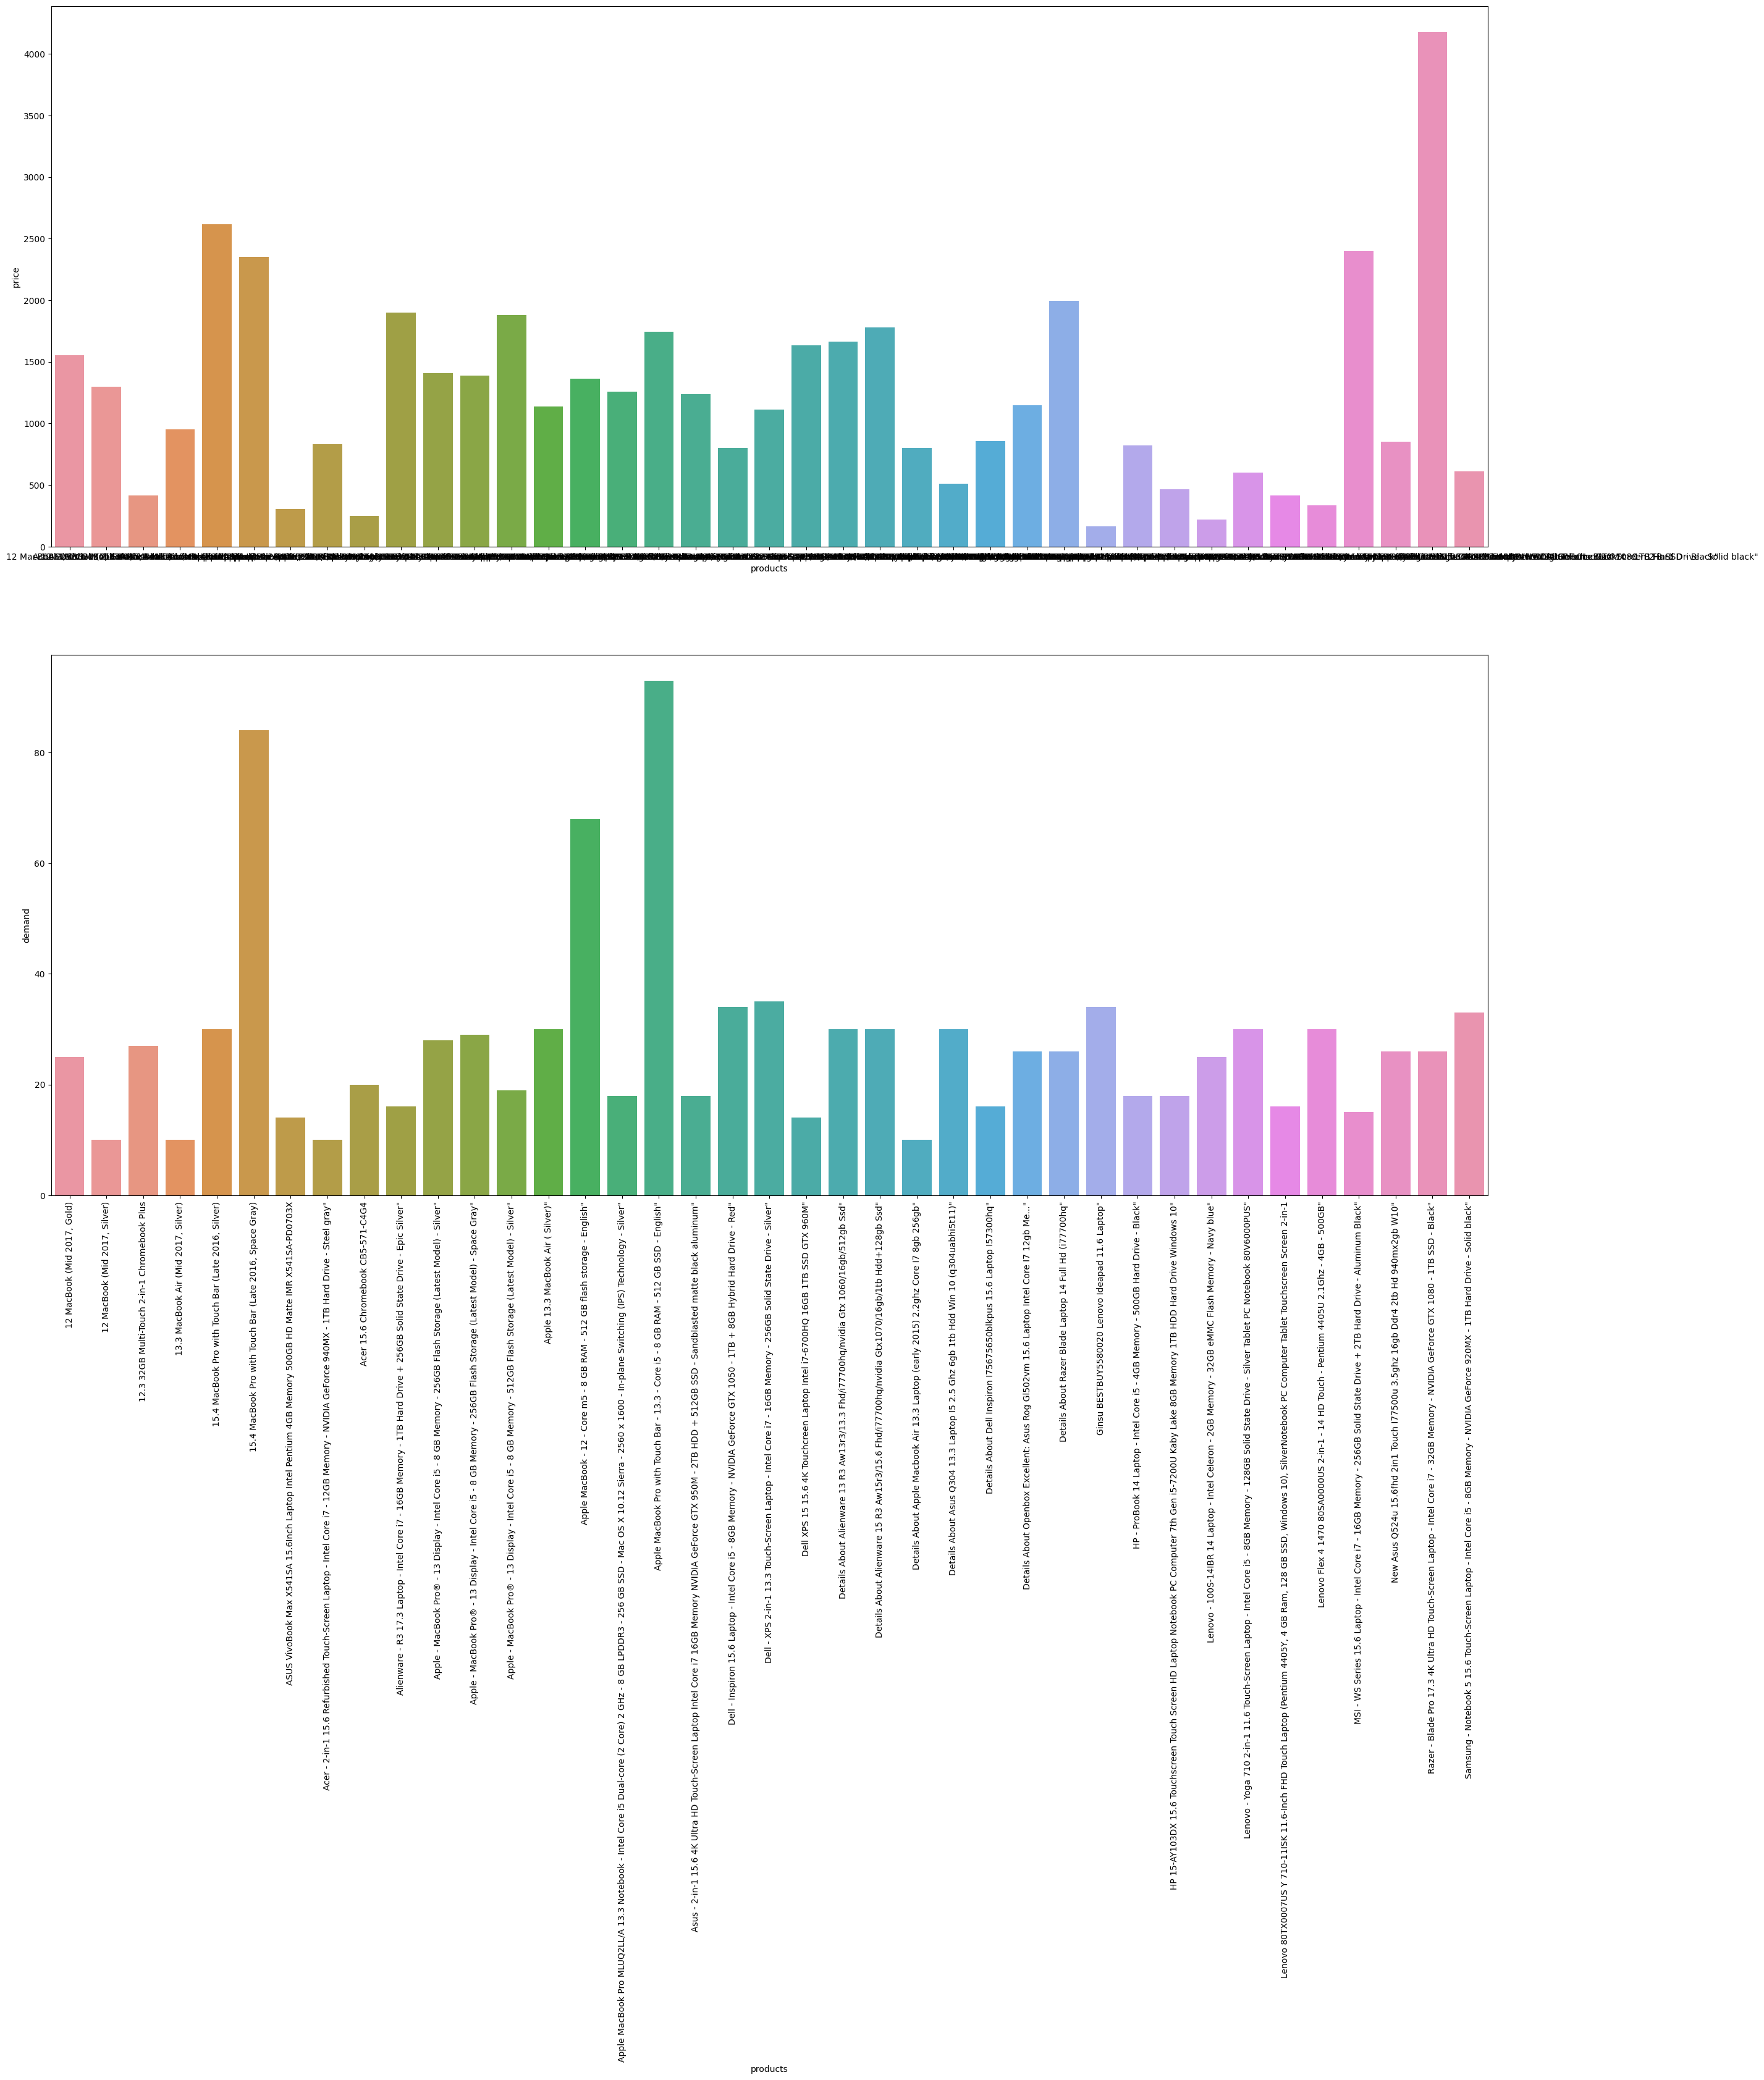

In [42]:
plt.figure(figsize=(30, 25))

plt.subplot(2, 1, 1)
aux1 = pd.DataFrame(x_price.apply(lambda x: x.median())).reset_index()
aux1.columns = ['products', 'price']
plt.xticks([])
sns.barplot(x='products', y='price', data=aux1)

plt.subplot(2, 1, 2)
aux2 = pd.DataFrame(y_demand.apply(lambda x: x.sum())).reset_index()
aux2.columns = ['products', 'demand']
plt.xticks(rotation=90)
sns.barplot(x='products', y='demand', data=aux2);

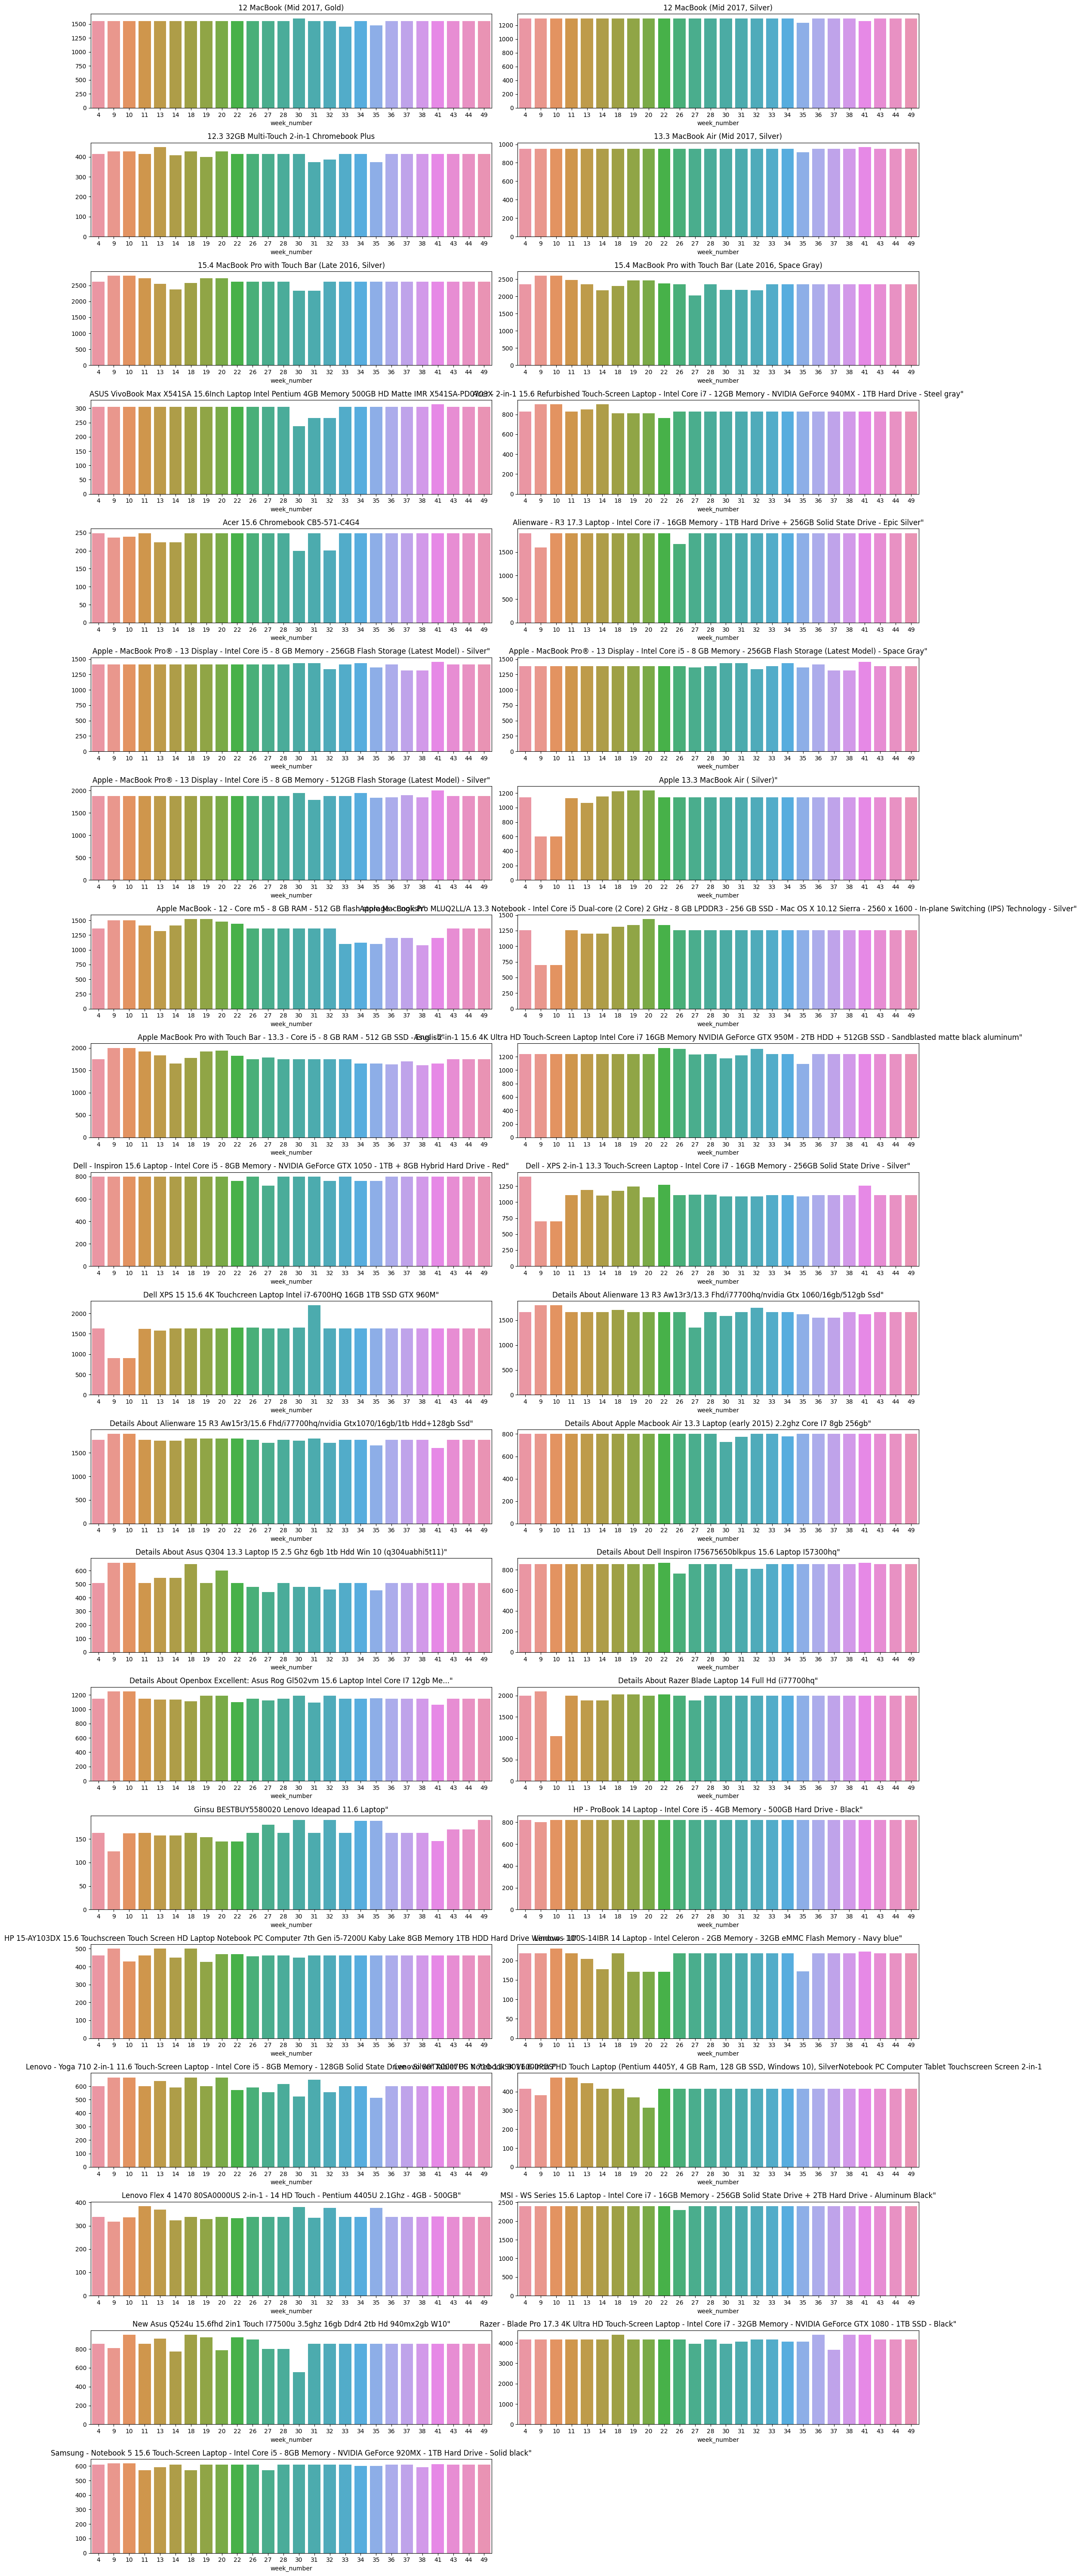

In [43]:
a = x_price.columns

x_price = x_price.reset_index()

plt.figure(figsize=(20, 60))
for k in range(1, len(x_price.columns)):
    plt.subplot(20, 2, k)
    sns.barplot(data=x_price, x=x_price['week_number'], y=x_price[x_price.columns[k]]);
    plt.title(a[k-1])
    plt.ylabel('')
    plt.tight_layout()

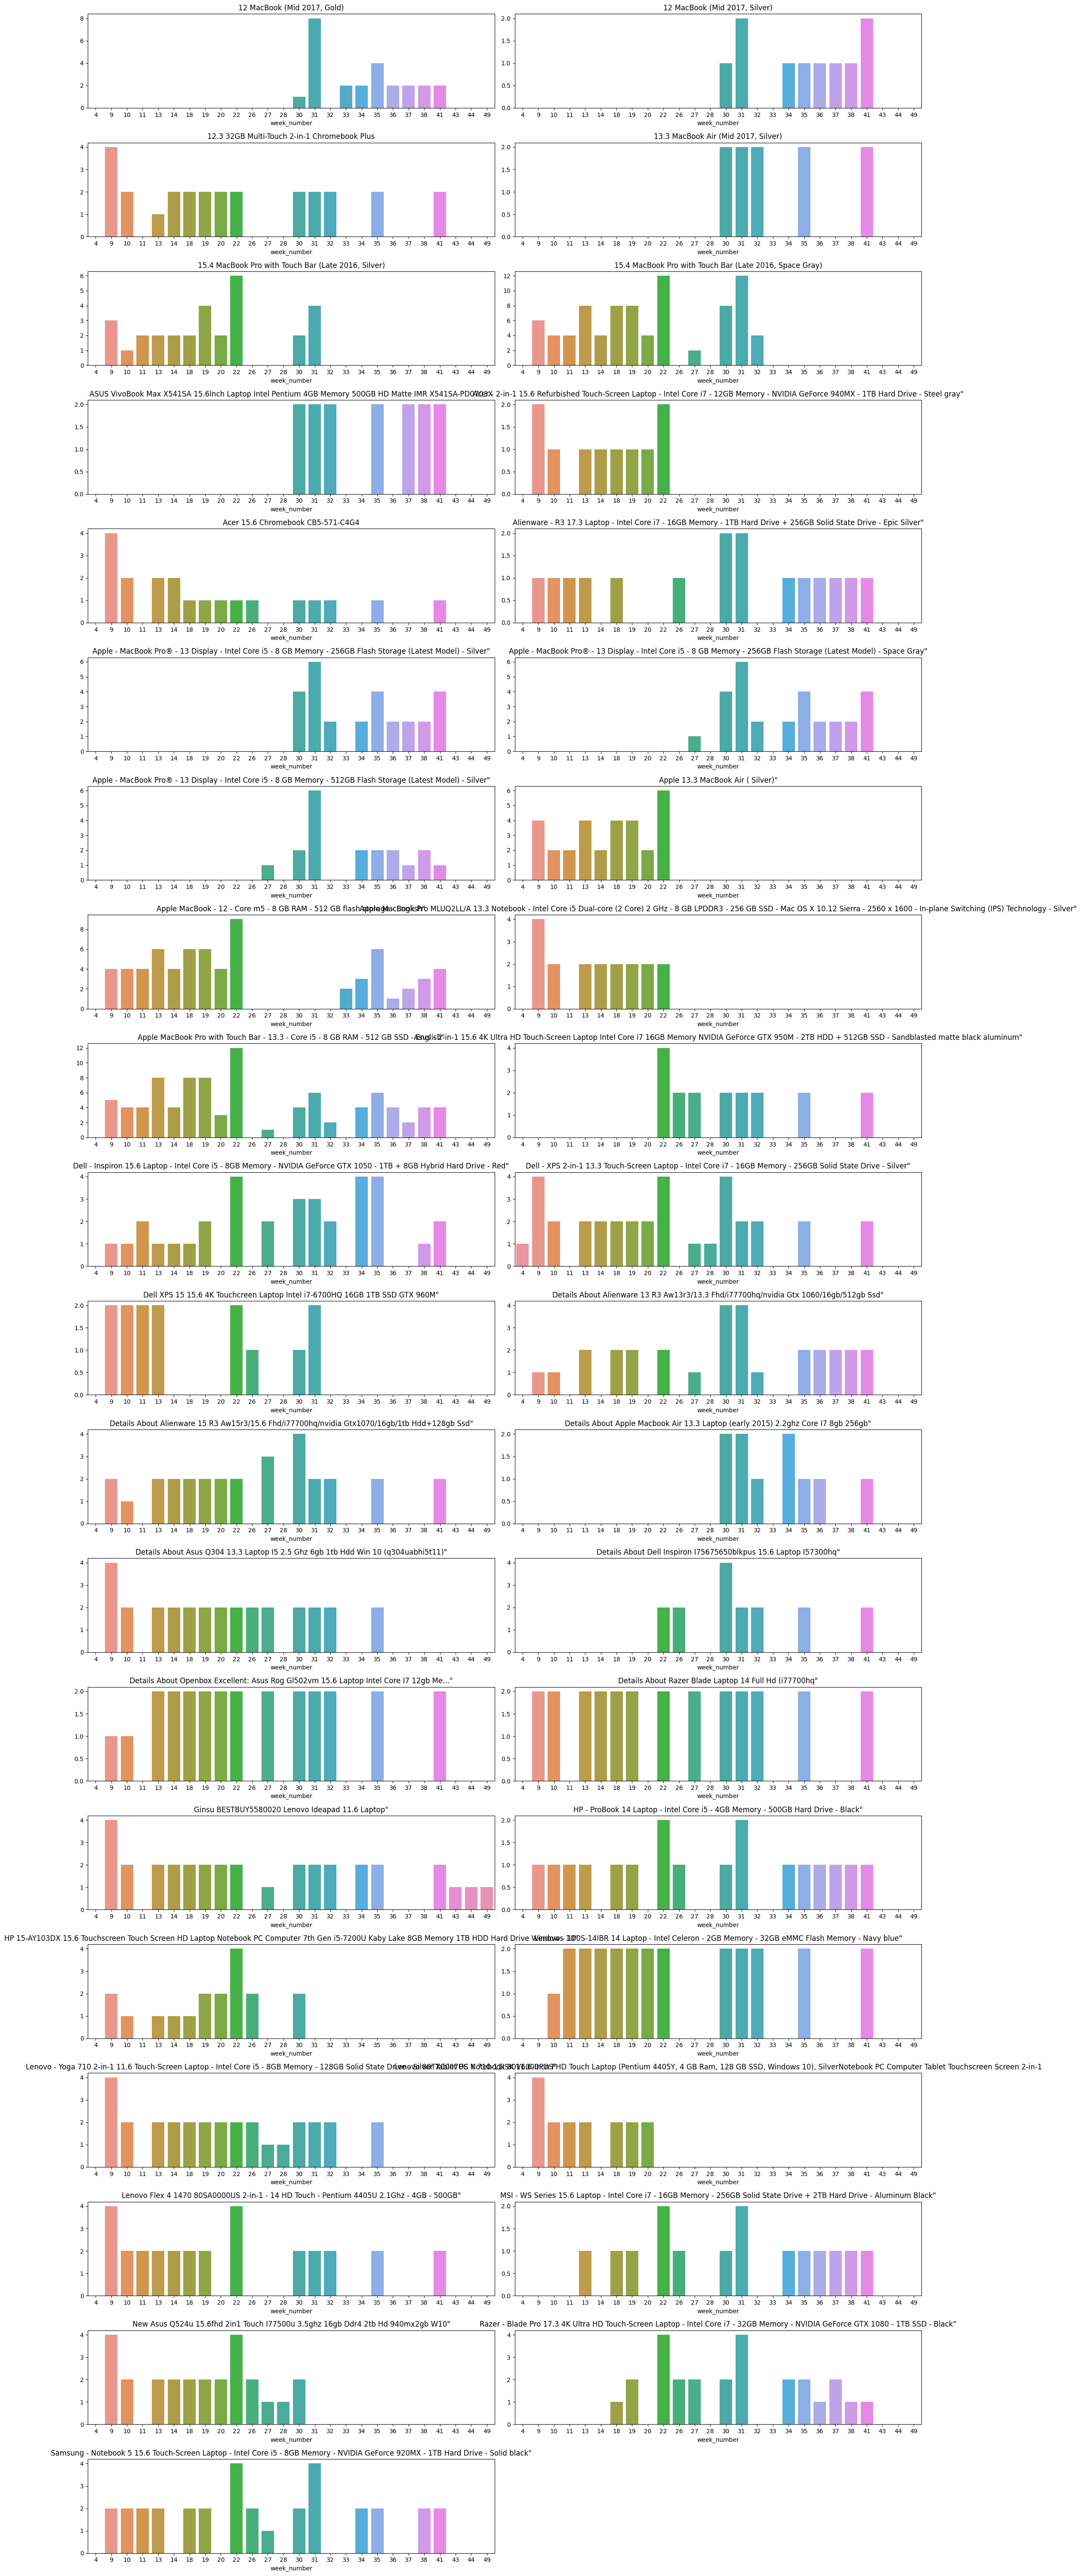

In [44]:
a = y_demand.columns

y_demand = y_demand.reset_index()

plt.figure(figsize=(20, 60))
for k in range(1, len(y_demand.columns)):
    plt.subplot(20, 2, k)
    sns.barplot(data=y_demand, x=y_demand['week_number'], y=y_demand[y_demand.columns[k]]);
    plt.title(a[k-1])
    plt.ylabel('')
    plt.tight_layout()

# 6.0 Machine Learning Modeling

## 6.1 Price Elasticity - 12 MacBook (Mid 2017, Gold)

In [59]:
x_laptop = x_price['12 MacBook (Mid 2017, Gold)']
y_laptop = y_demand['12 MacBook (Mid 2017, Gold)']

X_laptop = sm.add_constant(x_laptop)
model = sm.OLS(y_laptop, X_laptop)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:     12 MacBook (Mid 2017, Gold)   R-squared:                       0.081
Model:                                     OLS   Adj. R-squared:                  0.042
Method:                          Least Squares   F-statistic:                     2.108
Date:                         Sun, 25 Jun 2023   Prob (F-statistic):              0.159
Time:                                 19:02:27   Log-Likelihood:                -50.564
No. Observations:                           26   AIC:                             105.1
Df Residuals:                               24   BIC:                             107.6
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

## 6.2 Todas as colunas

In [60]:
results_values_laptop = {
    "name": [],
    "price_elasticity": [],
    "price_mean": [],
    "quantity_mean": [],
    "intercept": [],
    "slope": [],
    "rsquared": [],
    "p_value": [],
}

for column in x_price.columns[1:]:
    column_points = []
    for i in range(len(x_price[column])):
        column_points.append((x_price[column][i], y_demand[column][i]))
    df_model = pd.DataFrame(list(column_points), columns=['x_price', 'y_demand'])

    x_laptop = df_model['x_price']
    y_laptop = df_model['y_demand']

    X_laptop = sm.add_constant(x_laptop)
    model = sm.OLS(y_laptop, X_laptop)
    results = model.fit()
    
    if results.f_pvalue < 0.05:
        rsquared = results.rsquared
        p_value = results.f_pvalue
        intercept, slope = results.params
        mean_price = np.mean(x_laptop)
        mean_quantity = np.mean(y_laptop)
    
        price_elasticity = slope*(mean_price/mean_quantity)

        results_values_laptop['name'].append(column)
        results_values_laptop['price_elasticity'].append(price_elasticity)
        results_values_laptop['price_mean'].append(mean_price)
        results_values_laptop['quantity_mean'].append(mean_quantity)
        results_values_laptop['intercept'].append(intercept)
        results_values_laptop['slope'].append(slope)
        results_values_laptop['rsquared'].append(rsquared)
        results_values_laptop['p_value'].append(p_value)

df_elasticity = pd.DataFrame(results_values_laptop)

# 7.0 Elasticity

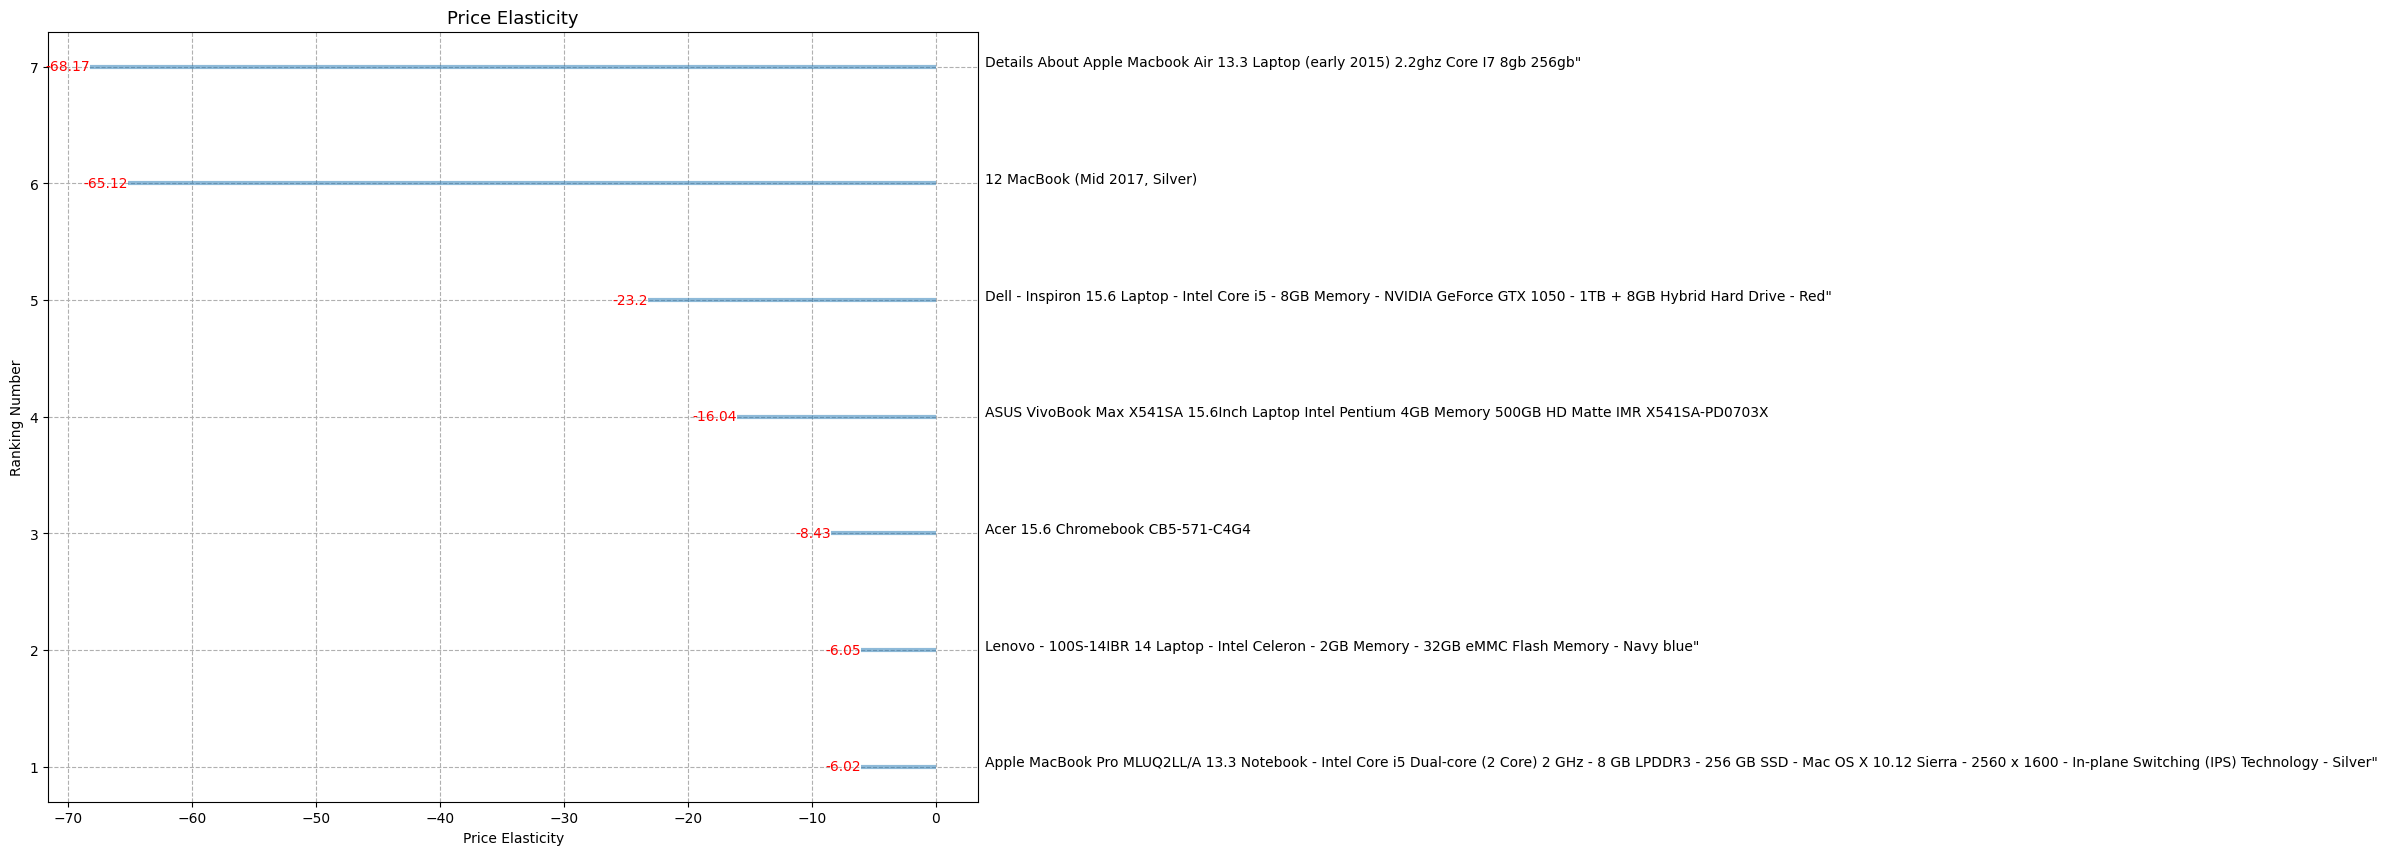

In [85]:
df_elasticity['ranking'] = df_elasticity.loc[:, 'price_elasticity'].rank(ascending=False).astype(int)
df_elasticity = df_elasticity.reset_index(drop=True)

plt.figure(figsize=(12, 10))
plt.hlines(y=df_elasticity['ranking'], xmin=0, xmax=df_elasticity['price_elasticity'], alpha=0.5, linewidth=3)

for name, p in zip(df_elasticity['name'], df_elasticity['ranking']):
    plt.text(4, p, name)

for x, y, s in zip(df_elasticity['price_elasticity'], df_elasticity['ranking'], df_elasticity['price_elasticity']):
    plt.text(x, y, round(s, 2), horizontalalignment='right' if x < 0 else 'left', 
verticalalignment='center', fontdict={'color': 'red' if x < 0 else 'green', 'size':10})
    
plt.gca().set(ylabel='Ranking Number', xlabel='Price Elasticity')
plt.title('Price Elasticity', fontdict={'size': 13})
plt.grid(linestyle='--');

In [86]:
df_order_elasticity = df_elasticity[['ranking', 'name', 'price_elasticity']].sort_values(by='price_elasticity', ascending=False)
df_order_elasticity

ranking                                               name  \
3        1  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...   
6        2  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...   
2        3                  Acer 15.6 Chromebook CB5-571-C4G4   
1        4  ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...   
4        5  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...   
0        6                      12 MacBook (Mid 2017, Silver)   
5        7  Details About Apple Macbook Air 13.3 Laptop (e...   

   price_elasticity  
3         -6.018642  
6         -6.049399  
2         -8.432545  
1        -16.039643  
4        -23.203537  
0        -65.115595  
5        -68.165723